In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import neighbors
from math import sqrt
import joblib

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder # import

import joblib
import warnings 
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv("census_income.csv")

In [54]:
df

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

In [55]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Observation:
    
    As we can observe that there is no  missing value in the dataset but we have to check about whitespaces,?,NA,-.

In [56]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64





So, Here we can observe that there are "?" 1836  values in workclass and 1843 in occupation and 583 in Native country.so we have to replace this with np.nan

In [57]:
df=df.replace(' ?',np.NaN)

Now we have to check is there any whitespacs,NA,or "-".

In [58]:
df.isin([' ','NA','-']).sum().any()

False

As we can observe that there is no present of any whitespcaes,NA or "-" in the dataset.

As we know that dataset is large so we have to check is there any duplicate entry in the dataset.

In [59]:
df.duplicated().sum()

24

In [60]:
df.drop_duplicates(keep='last', inplace=True)


In [61]:
df.shape

(32536, 15)

<AxesSubplot:>

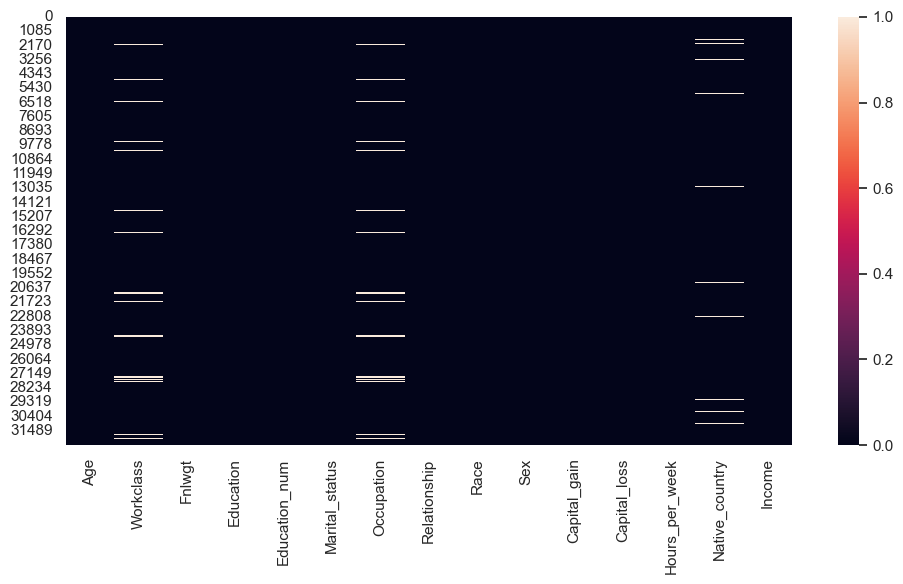

In [62]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())


Observation:
     
   So here clearly we can see that there is missing values are present in workclass, occupation and native country.

In [63]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                Missing Values  % Missing data
Occupation                1843        5.664495
Workclass                 1836        5.642980
Native_country             582        1.788788
Age                          0        0.000000
Fnlwgt                       0        0.000000
Education                    0        0.000000
Education_num                0        0.000000
Marital_status               0        0.000000
Relationship                 0        0.000000
Race                         0        0.000000
Sex                          0        0.000000
Capital_gain                 0        0.000000
Capital_loss                 0        0.000000
Hours_per_week               0        0.000000
Income                       0        0.000000


In [64]:
df.nunique().to_frame("No. of unique values")

No. of unique values
Age                               73
Workclass                          8
Fnlwgt                         21647
Education                         16
Education_num                     16
Marital_status                     7
Occupation                        14
Relationship                       6
Race                               5
Sex                                2
Capital_gain                     119
Capital_loss                      92
Hours_per_week                    94
Native_country                    41
Income                             2

In [65]:
#Now we have fill the missing value
df['Occupation'] = df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Workclass'] = df['Workclass'].fillna(df['Workclass'].mode()[0])
df['Native_country'] = df['Native_country'].fillna(df['Native_country'].mode()[0])


In [66]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Now there is no missing value present in the dataset.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


Observation:
    
Dataset contains 32536 rows and 15 columns.

There are categorical and numerical data with dtypes object and integer.


Sererate the numical and categorical column.

In [68]:
categorial_col = []
for i in df.dtypes.index:
    if df.dtypes[i]  == "object":
        categorial_col.append(i)
print("Categorial Columns: " , categorial_col)  
print("\n")



numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: " , numerical_col)

Categorial Columns:  ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Numerical Columns:  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [69]:
df.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32536.000000  3.253600e+04   32536.000000  32536.000000  32536.000000   
mean      38.585536  1.897843e+05      10.081725   1078.410069     87.370912   
std       13.638193  1.055563e+05       2.571622   7388.068465    403.107737   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.369932e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32536.000000  
mean        40.440343  
std         12.347079  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

Observation:

The average age of the individuals in the dataset is 38, with the lowest and maximum ages being 17 and 90, respectively.



Ten years is the mean amount of education, with minimum and maximum years spent in school being one and sixteen, respectively.



The maximum capital gain is 99999, while the least and average are 0. This looks strange; perhaps there was a data gathering error.



With an average of 87 data points, the capital loss ranges from 0 to 4356. There must have been a data gathering error.



The range of hours spent per week is 1 to 99, with an average of 40 hours.
    

In [70]:
#Now check the value count of each and every column

for i in df.columns:
    value_counts = df[i].value_counts()
    print(f"Value counts for {i}:\n{value_counts}\n")

Value counts for Age:
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

Value counts for Workclass:
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

Value counts for Fnlwgt:
164190    13
123011    13
203488    13
121124    12
113364    12
          ..
140176     1
318264     1
329205     1
171373     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

Value counts for Education:
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th          

# EDA(Exploratory Data Analysis)

Lets Start with the target variable "Income"

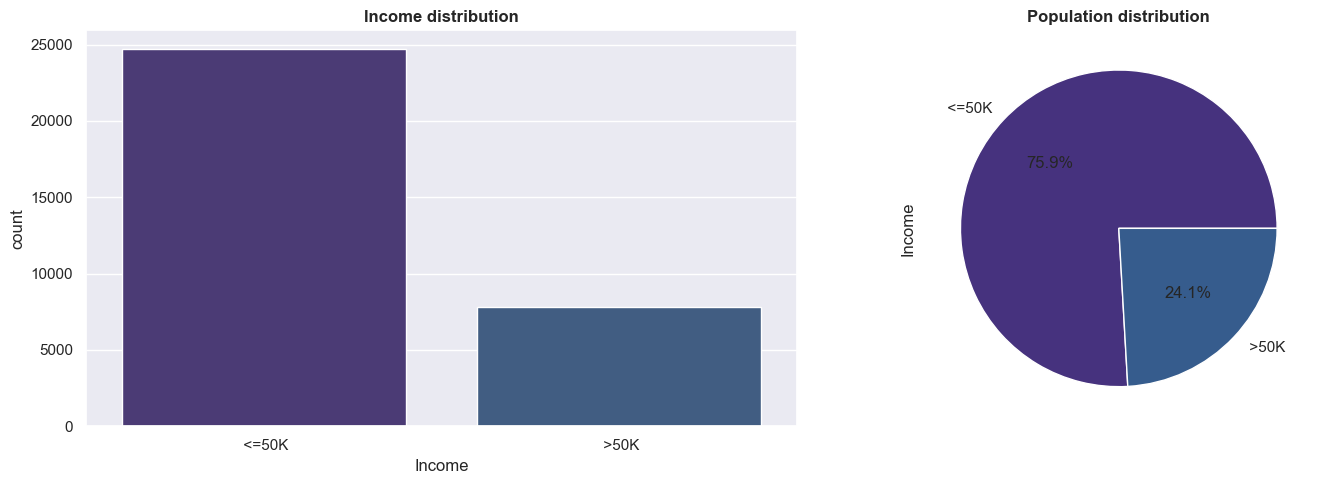

In [71]:
plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('viridis')


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
sns.countplot(x='Income', data=df, ax=axes[0])
axes[0].set_title('Income distribution',fontweight = 'bold')

# Pie plot
df['Income'].value_counts().plot.pie( autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Population distribution', fontweight = 'bold')

# Show the plots
plt.show()

Observation:
    
75.9% populations which is almost 24697 people have income less of equal to 50000. only 24.1% people have income more than greater than 50000.

Data is imbalanced so we have to treat it later because income is our target value.

# Age

In [72]:
# Defining function to create new columns to classify people according to different age groups
def age_group(x):
    x = int(x)
    x = abs(x)
    if 18 < x < 31:
        return "17-30"
    elif 30 < x < 41:
        return '31-40'
    elif 40 < x < 51:
        return '41-50'
    elif 50 < x < 61:
        return "51-60"
    elif 60 < x < 71:
        return "61-70"
    else:
        return 'Greater Than 70'

In [73]:
# Applying the function to create a new 'Age Group' column
df['Age Group'] = df['Age'].apply(age_group)

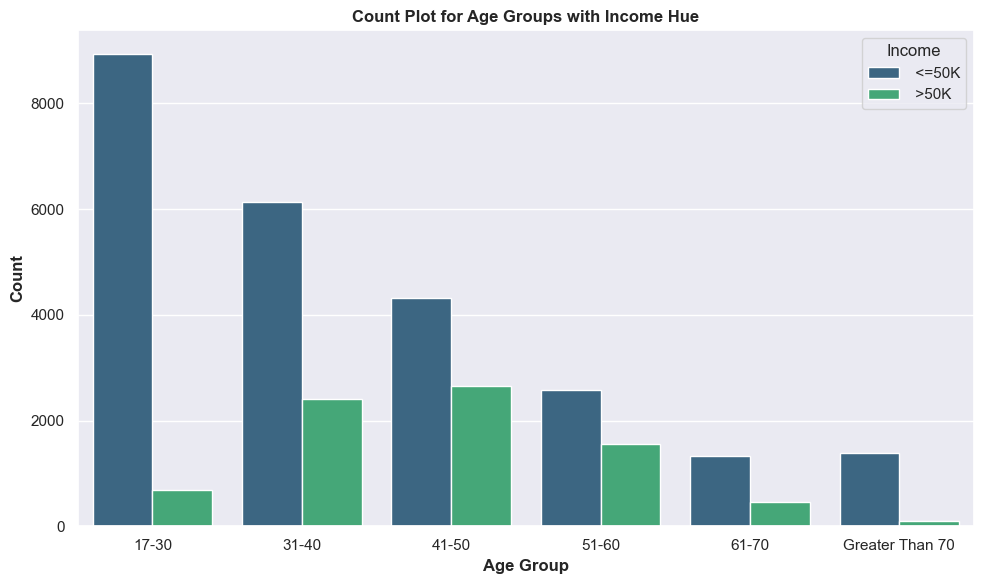

In [74]:
age_order = df['Age Group'].value_counts().index[::1]

plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', data=df, hue='Income', palette='viridis', order=age_order)
plt.title('Count Plot for Age Groups with Income Hue', fontweight='bold')
plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()

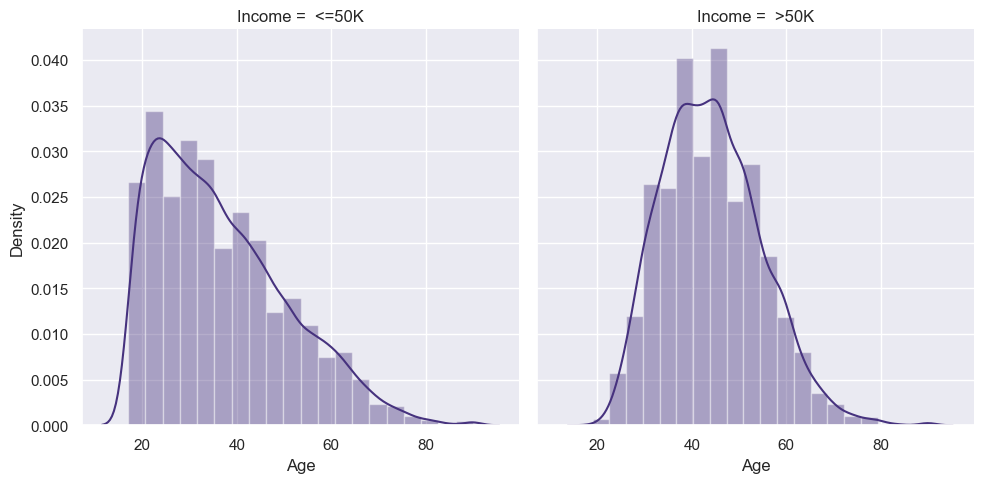

In [75]:

ax = sns.FacetGrid(df, col='Income', height=5)
ax.map(sns.distplot, 'Age', kde=True, bins=20)  # You can adjust the number of bins as needed
plt.show()


Here's a curious observation. We already know that just 24% of people make more than $50,000 per year, and this graph shows which age group they belong to.

Almost 10% of those between the ages of 19 and 30 make more than $50,000, while the figure drops even more for those over the age of 70. Perhaps some lucky old individuals have devised a better retirement plan than the rest of the elderly.


The age groups 41-50 and 51-60 have the highest percentage of those earning more than $50,000. It will be fascinating to learn which occupation contributed to this revenue falling into this category.

# Workclass

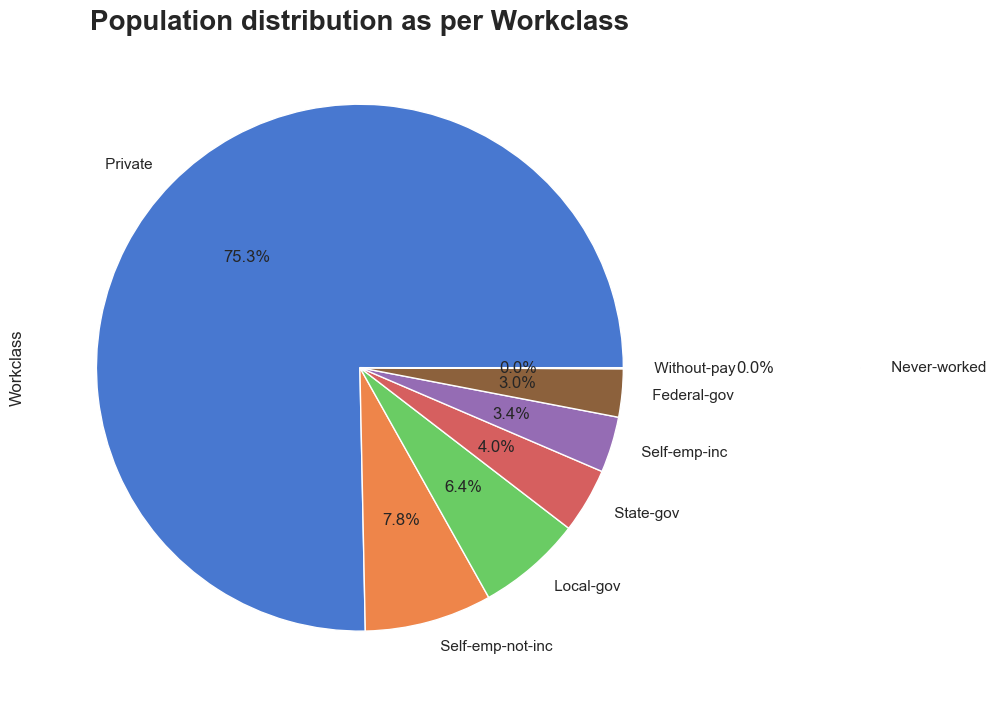

In [76]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('muted')
plt.figure(figsize=(10,10))
df['Workclass'].value_counts().plot.pie(explode=[0,0,0,0,0,0,0,0.9],autopct='%2.1f%%')
plt.title('Population distribution as per Workclass', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

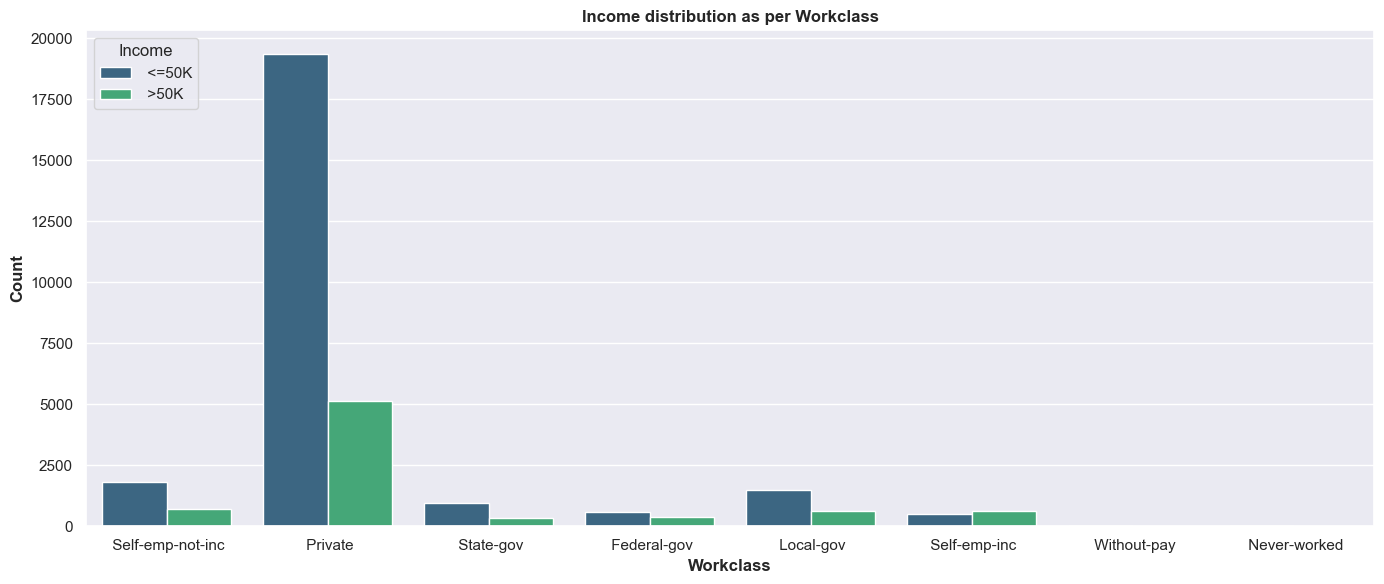

In [77]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Workclass', data=df, hue='Income', palette='viridis')
plt.title('Income distribution as per Workclass', fontweight='bold')
plt.xlabel('Workclass', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()

In [78]:
pd.crosstab(df['Income'],df["Workclass"], margins=True)

Workclass   Federal-gov   Local-gov   Never-worked   Private   Self-emp-inc  \
Income                                                                        
 <=50K              589        1476              7     19357            494   
 >50K               371         617              0      5152            622   
All                 960        2093              7     24509           1116   

Workclass   Self-emp-not-inc   State-gov   Without-pay    All  
Income                                                         
 <=50K                  1816         944            14  24697  
 >50K                    724         353             0   7839  
All                     2540        1297            14  32536

Observation:
    
75.3% of the population works in the private sector, with 7.8% working as self-employed individuals.

An interesting finding comes from the Self-Employed Incorporated group.

when the proportion of earners over 50000$ more than who earnes less than 50000$.

There is a large pay disparity amongst private sector employees, with less than 25% earning more than 50000$ per year.

Another interesting finding comes from a Federal Government countplot, which shows a very small variation in the amount of persons earning more or less than 50000$ each year. With a few exceptions, the same holds true for state governments.

Yes, there is a category for persons who have never worked and those who labor for free, but it is quite small.These individuals might be unemployed or college students.

# Education Vs Income

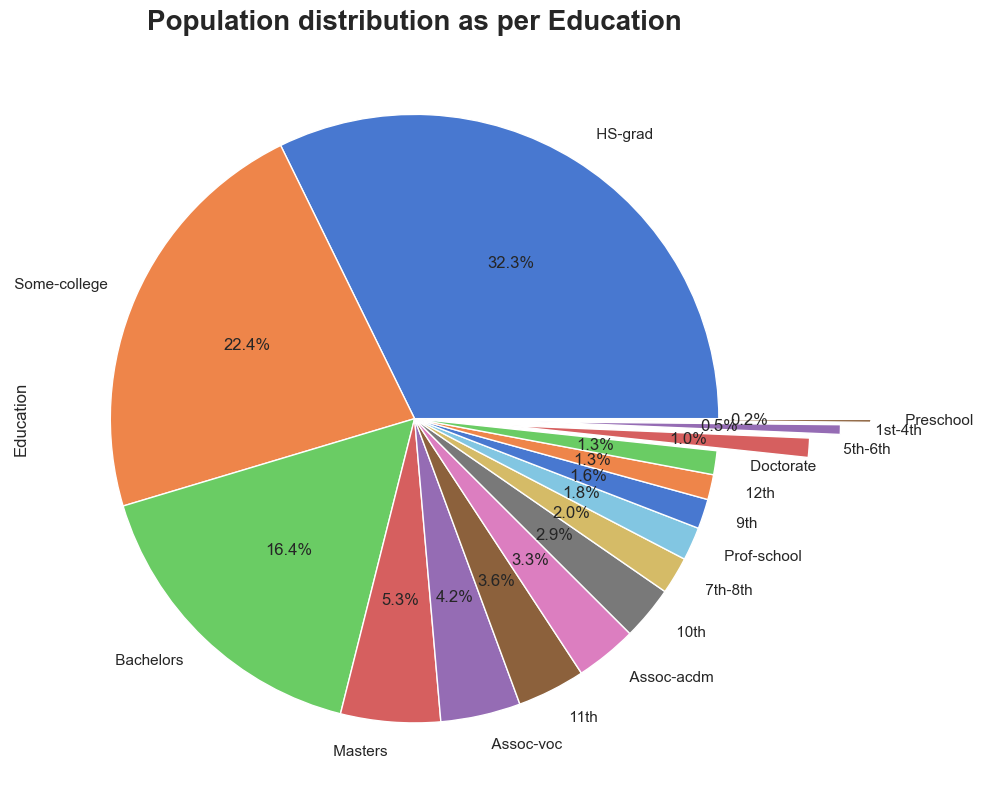

In [79]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('muted')

# Get the counts for each 'Education'
education_counts = df['Education'].value_counts()

# Create a pie chart for the distribution of 'Education' with equal explode parts
plt.figure(figsize=(10, 10))

# Explode in 16 equal parts
explode = [0] * (len(education_counts) - 3) + [0.3, 0.4, 0.5]

education_counts.plot.pie(explode=explode, autopct='%2.1f%%')
plt.title('Population distribution as per Education', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

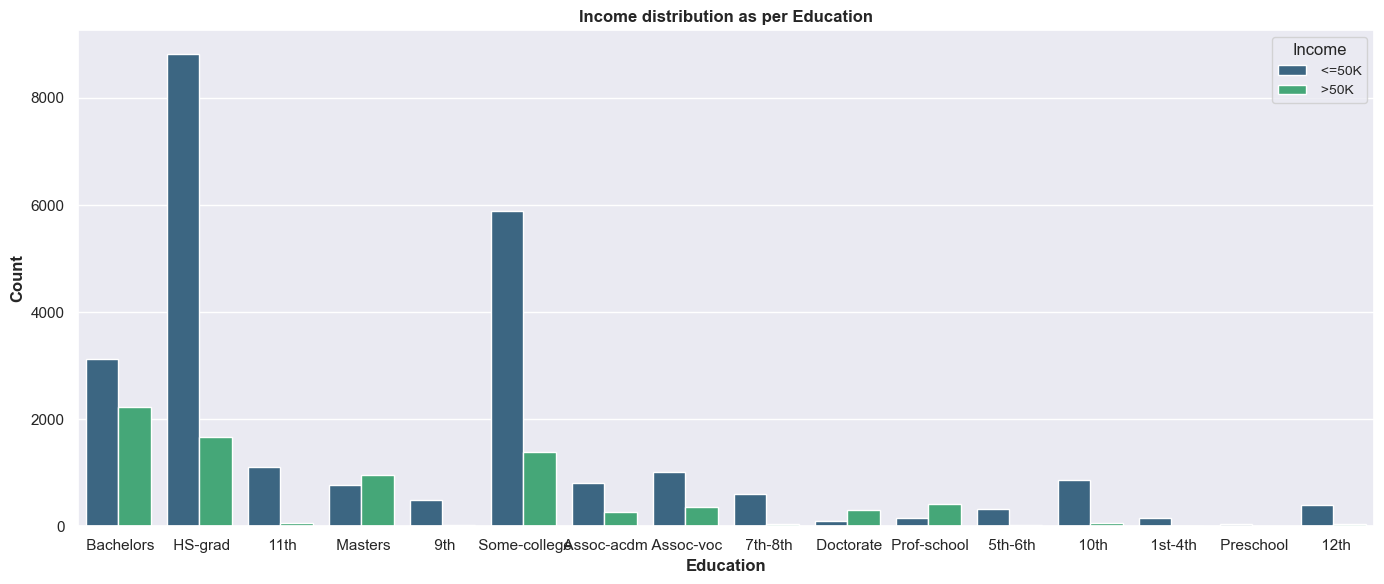

In [80]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Education', data=df, hue='Income', palette='viridis')
plt.title('Income distribution as per Education', fontweight='bold')
plt.xlabel('Education', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.legend(title='Income', title_fontsize='12', fontsize='10', loc='upper right')
plt.show()

Observation:
    
The most common educational level among the general population is HS-Grad, held by 32.3% of individuals.

5.3% of the population holds a master's degree, and 1.3% has a doctorate. This group includes intelligent, well-educated people.

Few persons with less than a 12th grade degree who make over 50000$ a year.

The majority of those earning over 50000$ have a bachelor's degree.

This brings up an intriguing point regarding the wealth of highly educated individuals. The number of those earning more than 50000$ annually surpasses the number of those earning less when it comes to those with Masters, Doctorates, and Prof-School degrees.

A small number of Assoc-voc or Assoc-acad members make more than 50000$ annually!

In [81]:
pd.crosstab(df['Education'],df["Workclass"], margins=True)

Workclass       Federal-gov   Local-gov   Never-worked   Private  \
Education                                                          
 10th                     6          31              2       795   
 11th                     9          36              1      1041   
 12th                     5          19              0       373   
 1st-4th                  0           4              0       146   
 5th-6th                  1           9              0       295   
 7th-8th                  2          28              1       495   
 9th                      3          23              0       438   
 Assoc-acdm              55          88              0       776   
 Assoc-voc               38          86              0      1066   
 Bachelors              212         477              0      3722   
 Doctorate               16          27              0       196   
 HS-grad                263         503              1      8305   
 Masters                 67         342              0       941   
 Preschool                0           4              0        45   
 Prof-school             29          29              0       275   
 Some-college           254         387              2      5600   
All                     960        2093              7     24509   

Workclass       Self-emp-inc   Self-emp-not-inc   State-gov   Without-pay  \
Education                                                                   
 10th                     19                 67          13             0   
 11th                     14                 60          14             0   
 12th                      7                 19          10             0   
 1st-4th                   2                 13           1             0   
 5th-6th                   4                 19           4             0   
 7th-8th                  14                 94          10             1   
 9th                      10                 34           6             0   
 Assoc-acdm               35                 71          41             1   
 Assoc-voc                38                108          46             0   
 Bachelors               273                399         269             0   
 Doctorate                35                 50          89             0   
 HS-grad                 279                866         268             9   
 Masters                  79                124         169             0   
 Preschool                 0                  0           1             0   
 Prof-school              81                131          31             0   
 Some-college            226                485         325             3   
All                     1116               2540        1297            14   

Workclass        All  
Education             
 10th            933  
 11th           1175  
 12th            433  
 1st-4th         166  
 5th-6th         332  
 7th-8th         645  
 9th             514  
 Assoc-acdm     1067  
 Assoc-voc      1382  
 Bachelors      5352  
 Doctorate       413  
 HS-grad       10494  
 Masters        1722  
 Preschool        50  
 Prof-school     576  
 Some-college   7282  
All            32536

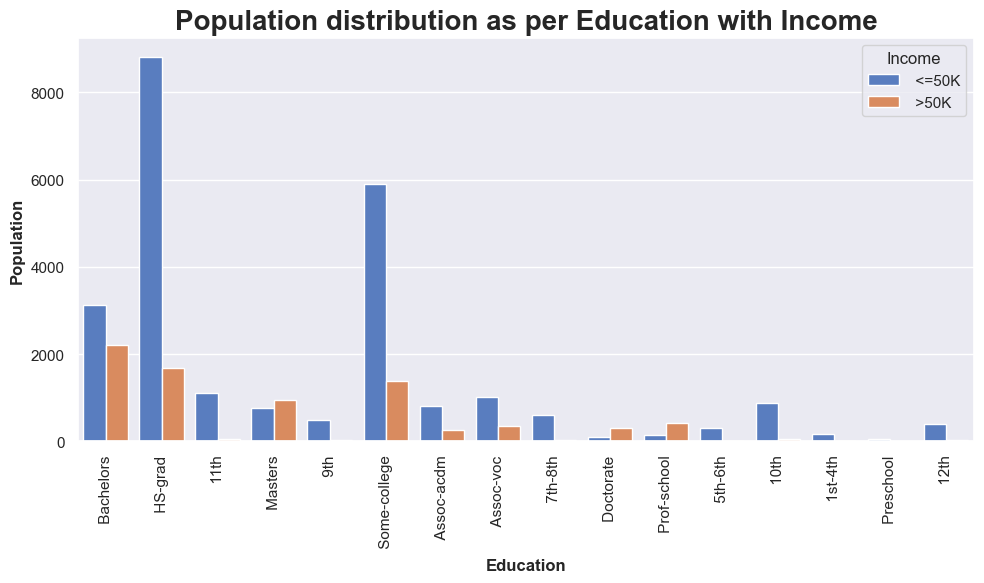

In [82]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Income', data=df)
plt.title('Population distribution as per Education with Income', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.xlabel('Education', fontweight='bold')
plt.ylabel('Population', fontweight='bold')
plt.legend(title='Income', title_fontsize='12',loc='upper right')
plt.tight_layout()
plt.show()

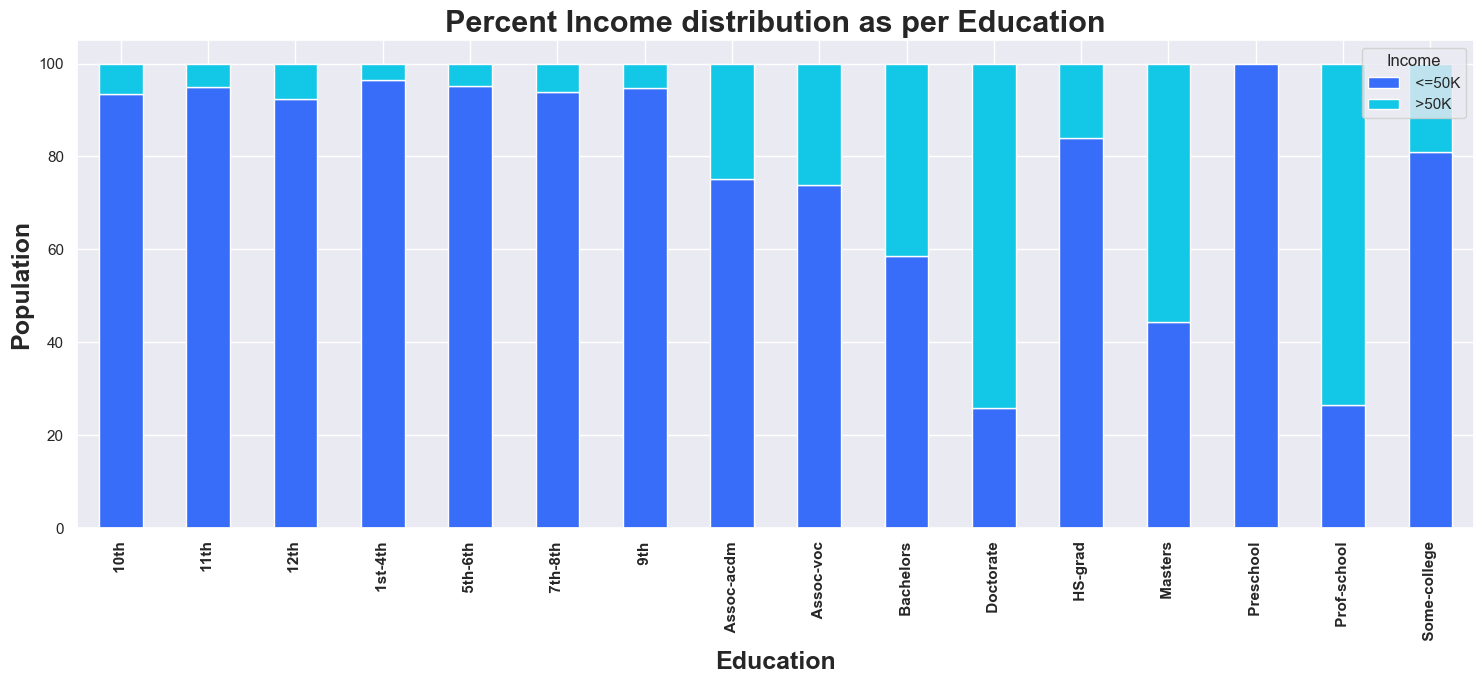

In [83]:
# Percentage Income distribution in terms of Education
sns.set_palette('rainbow')
table = pd.crosstab(df['Education'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,7))
plt.title('Percent Income distribution as per Education', fontsize=22, fontweight='bold')
plt.xlabel('Education', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

Observation:
    
In terms of percentage 75 % of Doctorate people earn more than 50K dollars an years, followed by Prof- school.

So, Highly earning people most of times comes with Masters or Doctorate education background.

From crosstab we can see that private sector is highest recuriter for HS-Grad with 8305 people.

Private sector is also major recurtier of highly eduacated people with masters, doctorate followed by local goverment.

# Now check Impact of Marital Status on Income

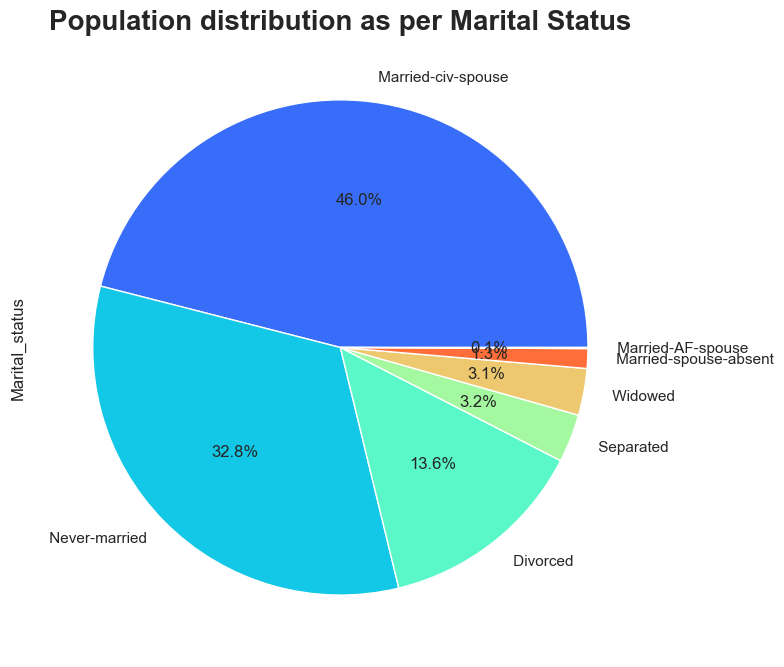

In [84]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(8,8))
df['Marital_status'].value_counts().plot.pie(autopct='%2.1f%%')
plt.title('Population distribution as per Marital Status', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

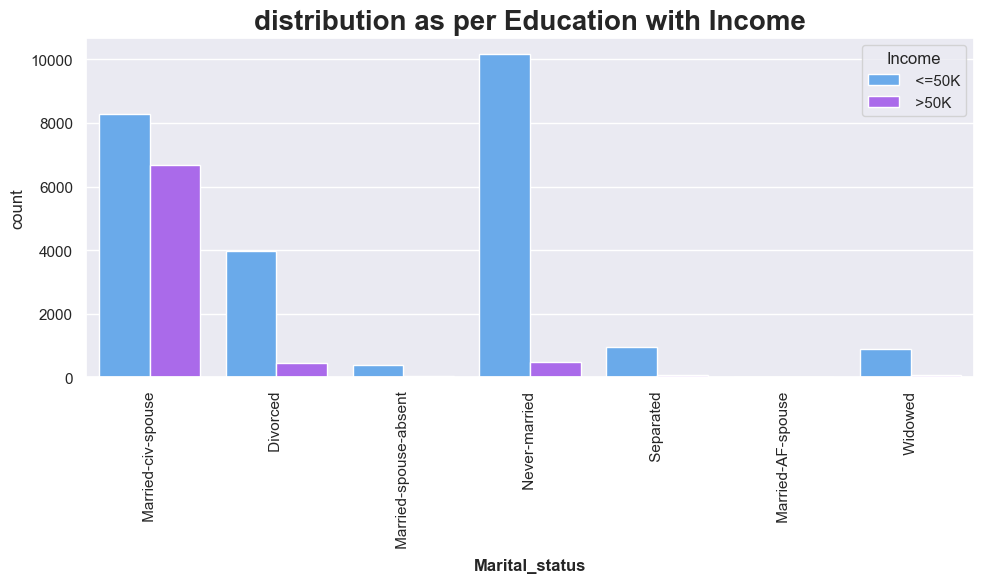

In [85]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_status', hue='Income', data=df,palette='cool')
plt.title('distribution as per Education with Income', fontsize=20, fontweight='bold',)
plt.xticks(rotation=90)
plt.xlabel('Marital_status', fontweight='bold')
plt.legend(title='Income', title_fontsize='12',loc='upper right')
plt.tight_layout()
plt.show()

In [86]:
pd.crosstab(df['Marital_status'],df["Income"], margins=True)

Income                   <=50K   >50K    All
Marital_status                              
 Divorced                 3978    463   4441
 Married-AF-spouse          13     10     23
 Married-civ-spouse       8280   6690  14970
 Married-spouse-absent     384     34    418
 Never-married           10175    491  10666
 Separated                 959     66   1025
 Widowed                   908     85    993
All                      24697   7839  32536


Married people are most like to earn more than 50000$ an year.

Reason Might be Emotional support and stability of life than who are divorced/separated.

One thing to note here is that Married-civ-spouse is the only category which has comparable number of people belonging to both categories.
For others, there are less than 25% of the adults earning more than 50000$ an year.

# Occupation VS Income

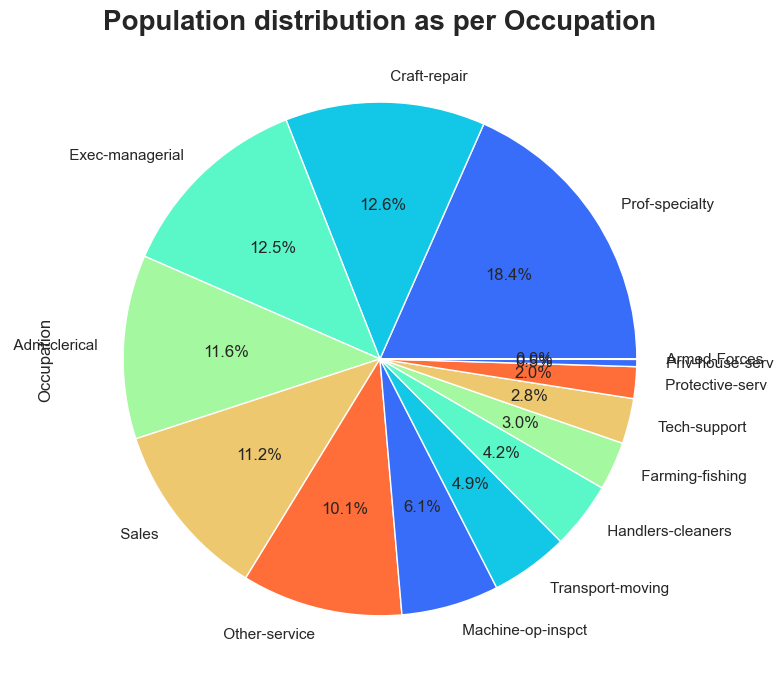

In [87]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(8,8))
df['Occupation'].value_counts().plot.pie(autopct='%2.1f%%')
plt.title('Population distribution as per Occupation', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

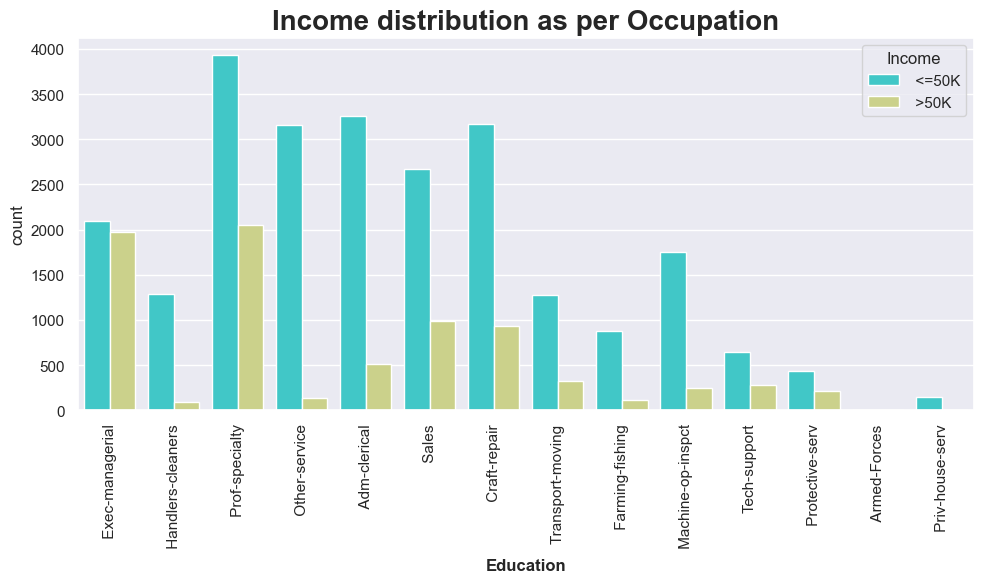

In [88]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Occupation', hue='Income', data=df,palette='rainbow')
plt.title('Income distribution as per Occupation', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.xlabel('Education', fontweight='bold')
plt.legend(title='Income', title_fontsize='12',loc='upper right')
plt.tight_layout()
plt.show()

Executive and management positions have an equal chance of paying above 50000 annually.
It is quite rare for employees in the armed forces, farming, fishing, machine operation, inspection, other services, administrative clerking, handling, and cleaning to make more than $50,000 annually.
Approximately 25% of sales employees make more than 50000 annually.

In [89]:
pd.crosstab(df['Occupation'],df["Income"], margins=True)

Income               <=50K   >50K    All
Occupation                              
 Adm-clerical         3260    507   3767
 Armed-Forces            8      1      9
 Craft-repair         3165    929   4094
 Exec-managerial      2097   1968   4065
 Farming-fishing       877    115    992
 Handlers-cleaners    1283     86   1369
 Machine-op-inspct    1751    249   2000
 Other-service        3154    137   3291
 Priv-house-serv       146      1    147
 Prof-specialty       3930   2049   5979
 Protective-serv       438    211    649
 Sales                2667    983   3650
 Tech-support          644    283    927
 Transport-moving     1277    320   1597
All                  24697   7839  32536

Prof-Speciality position with maximum 2049 peoples followed by Exec-managerial position with 1968 people leads chart for greater than 50K dollars an year.
If we talk in term of percentage probablity Exective Managerial position have 50% chances to lead in Greater than 50K dollars Club.
There's close to 33% probablity for an adult in Prof-specialty to earn more than 50K dollars an year.

Minimum chances for Greater than 50K Club comes from Private House Service occupation where 1/147 chance of getting more than 50K dollars an year.

Let check where these different occupation fit with respect to Work class through crosstab.

In [90]:
pd.crosstab(df['Occupation'],df["Workclass"], margins=True)

Workclass            Federal-gov   Local-gov   Never-worked   Private  \
Occupation                                                              
 Adm-clerical                317         283              0      2831   
 Armed-Forces                  9           0              0         0   
 Craft-repair                 64         146              0      3191   
 Exec-managerial             180         214              0      2690   
 Farming-fishing               8          29              0       453   
 Handlers-cleaners            23          47              0      1272   
 Machine-op-inspct            14          12              0      1911   
 Other-service                35         193              0      2736   
 Priv-house-serv               0           0              0       147   
 Prof-specialty              175         705              7      4145   
 Protective-serv              28         304              0       190   
 Sales                        14           7              0      2942   
 Tech-support                 68          38              0       735   
 Transport-moving             25         115              0      1266   
All                          960        2093              7     24509   

Workclass            Self-emp-inc   Self-emp-not-inc   State-gov  \
Occupation                                                         
 Adm-clerical                  31                 50         252   
 Armed-Forces                   0                  0           0   
 Craft-repair                 106                530          56   
 Exec-managerial              400                392         189   
 Farming-fishing               51                430          15   
 Handlers-cleaners              2                 15           9   
 Machine-op-inspct             13                 36          13   
 Other-service                 27                175         124   
 Priv-house-serv                0                  0           0   
 Prof-specialty               160                373         414   
 Protective-serv                5                  6         116   
 Sales                        291                385          11   
 Tech-support                   3                 26          57   
 Transport-moving              27                122          41   
All                          1116               2540        1297   

Workclass            Without-pay    All  
Occupation                               
 Adm-clerical                  3   3767  
 Armed-Forces                  0      9  
 Craft-repair                  1   4094  
 Exec-managerial               0   4065  
 Farming-fishing               6    992  
 Handlers-cleaners             1   1369  
 Machine-op-inspct             1   2000  
 Other-service                 1   3291  
 Priv-house-serv               0    147  
 Prof-specialty                0   5979  
 Protective-serv               0    649  
 Sales                         0   3650  
 Tech-support                  0    927  
 Transport-moving              1   1597  
All                           14  32536

Here is another surprising element, there are 7 peoples From Never Worked Category with High earning Profession of Prof-speciality. Same from Without pay workclass we find 6 peoples with Exec-Managerial. Possibly they are working with unpaid internship profile.

# Relationship VS Income

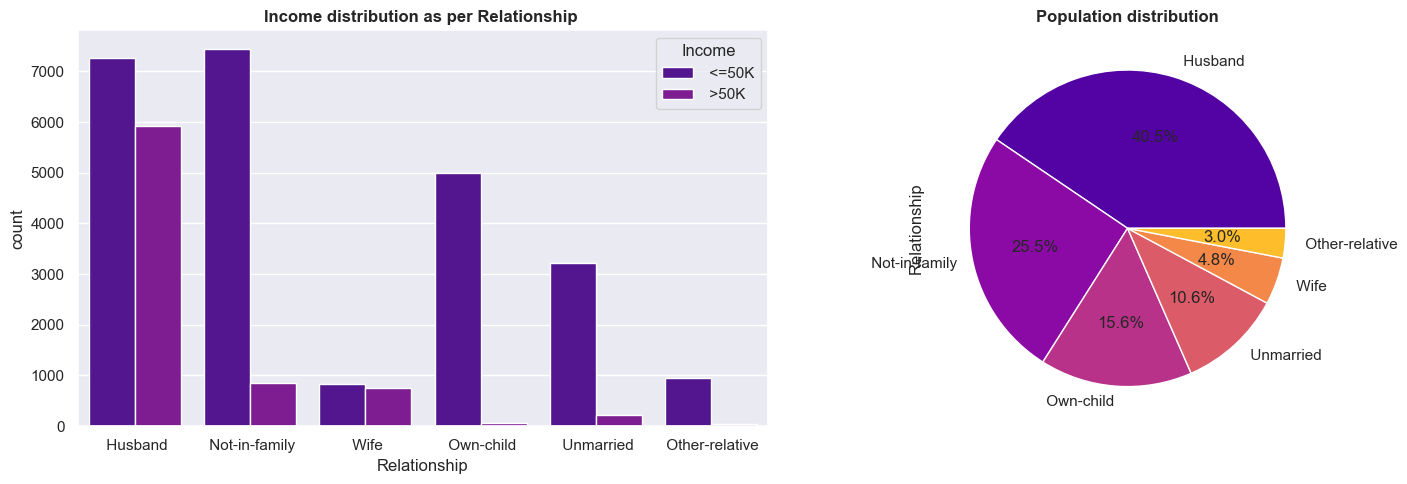

In [91]:
plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('plasma')


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
sns.countplot(x='Relationship', data=df,hue='Income', ax=axes[0])
axes[0].set_title('Income distribution as per Relationship ',fontweight = 'bold')

# Pie plot
df['Relationship'].value_counts().plot.pie( autopct='%1.1f%%', ax=axes[1],)
axes[1].set_title('Population distribution', fontweight = 'bold')

# Show the plots
plt.show()

Wives are equally likely to earn more than 50K dollars an year.
For Husbands, although significant, there is less possibility of them to earn more than 50K dollars an year.
There are just a handful of Unmarried people earning more than 50K dollars an year.

# Race vs Income

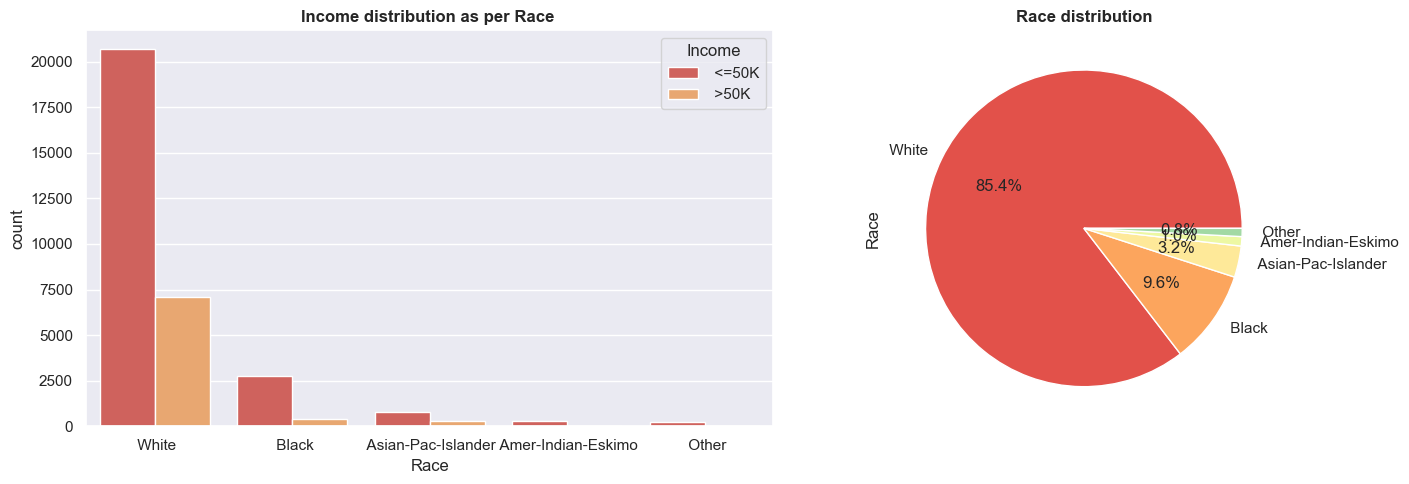

In [92]:
plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('Spectral')


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
sns.countplot(x='Race', data=df,hue='Income', ax=axes[0])
axes[0].set_title('Income distribution as per Race ',fontweight = 'bold')

# Pie plot
df['Race'].value_counts().plot.pie( autopct='%1.1f%%', ax=axes[1],)
axes[1].set_title('Race distribution', fontweight = 'bold')

# Show the plots
plt.show()

85.4 % peoples are whites followed by black community with 9.6%.
Maximum peoples in Greater than 50K Club are White.
- This observation is biased as we have very less data of other races. So Nothing Meaningful & reliable insight we can draw from it.

# Sex Vs Income

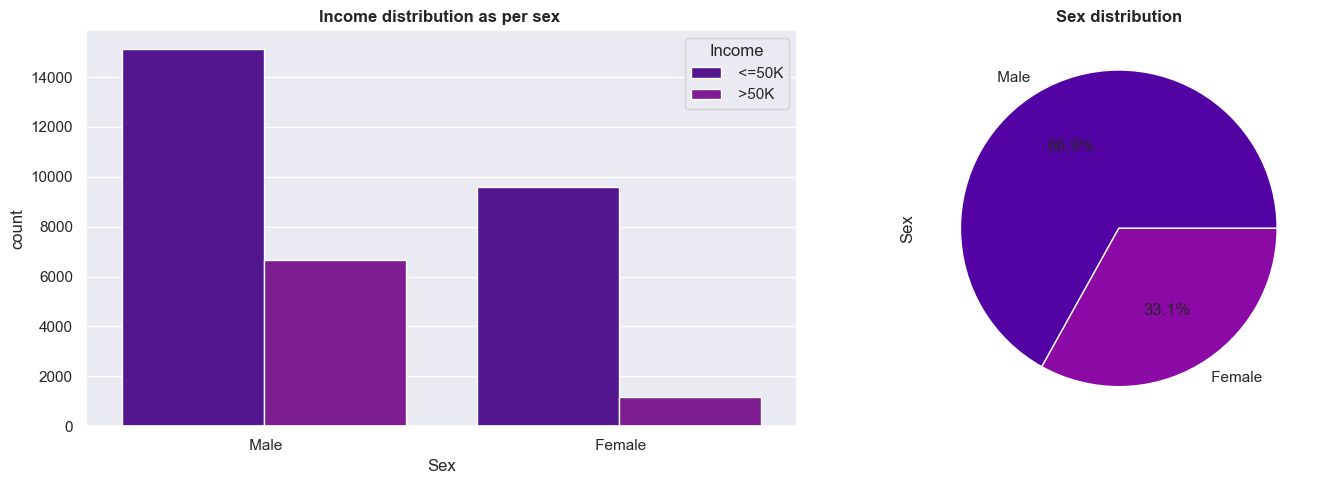

In [93]:
plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('plasma')


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
sns.countplot(x='Sex', data=df,hue='Income', ax=axes[0])
axes[0].set_title('Income distribution as per sex ',fontweight = 'bold')

# Pie plot
df['Sex'].value_counts().plot.pie( autopct='%1.1f%%', ax=axes[1],)
axes[1].set_title('Sex distribution', fontweight = 'bold')

# Show the plots
plt.show()

In [94]:
pd.crosstab(df['Occupation'],[df.Sex,df.Income], margins=True)

Sex                 Female         Male          All
Income               <=50K  >50K  <=50K  >50K       
Occupation                                          
 Adm-clerical         2323   212    937   295   3767
 Armed-Forces            0     0      8     1      9
 Craft-repair          202    20   2963   909   4094
 Exec-managerial       879   280   1218  1688   4065
 Farming-fishing        63     2    814   113    992
 Handlers-cleaners     160     4   1123    82   1369
 Machine-op-inspct     529    20   1222   229   2000
 Other-service        1748    51   1406    86   3291
 Priv-house-serv       138     1      8     0    147
 Prof-specialty       1917   437   2013  1612   5979
 Protective-serv        66    10    372   201    649
 Sales                1175    88   1492   895   3650
 Tech-support          302    45    342   238    927
 Transport-moving       81     9   1196   311   1597
All                   9583  1179  15114  6660  32536

Significant gap between male and female earnings.

Less than 10% Women in Greater Than 50000$ Club.

Around 33% of Men earning more than 50000$ an year.


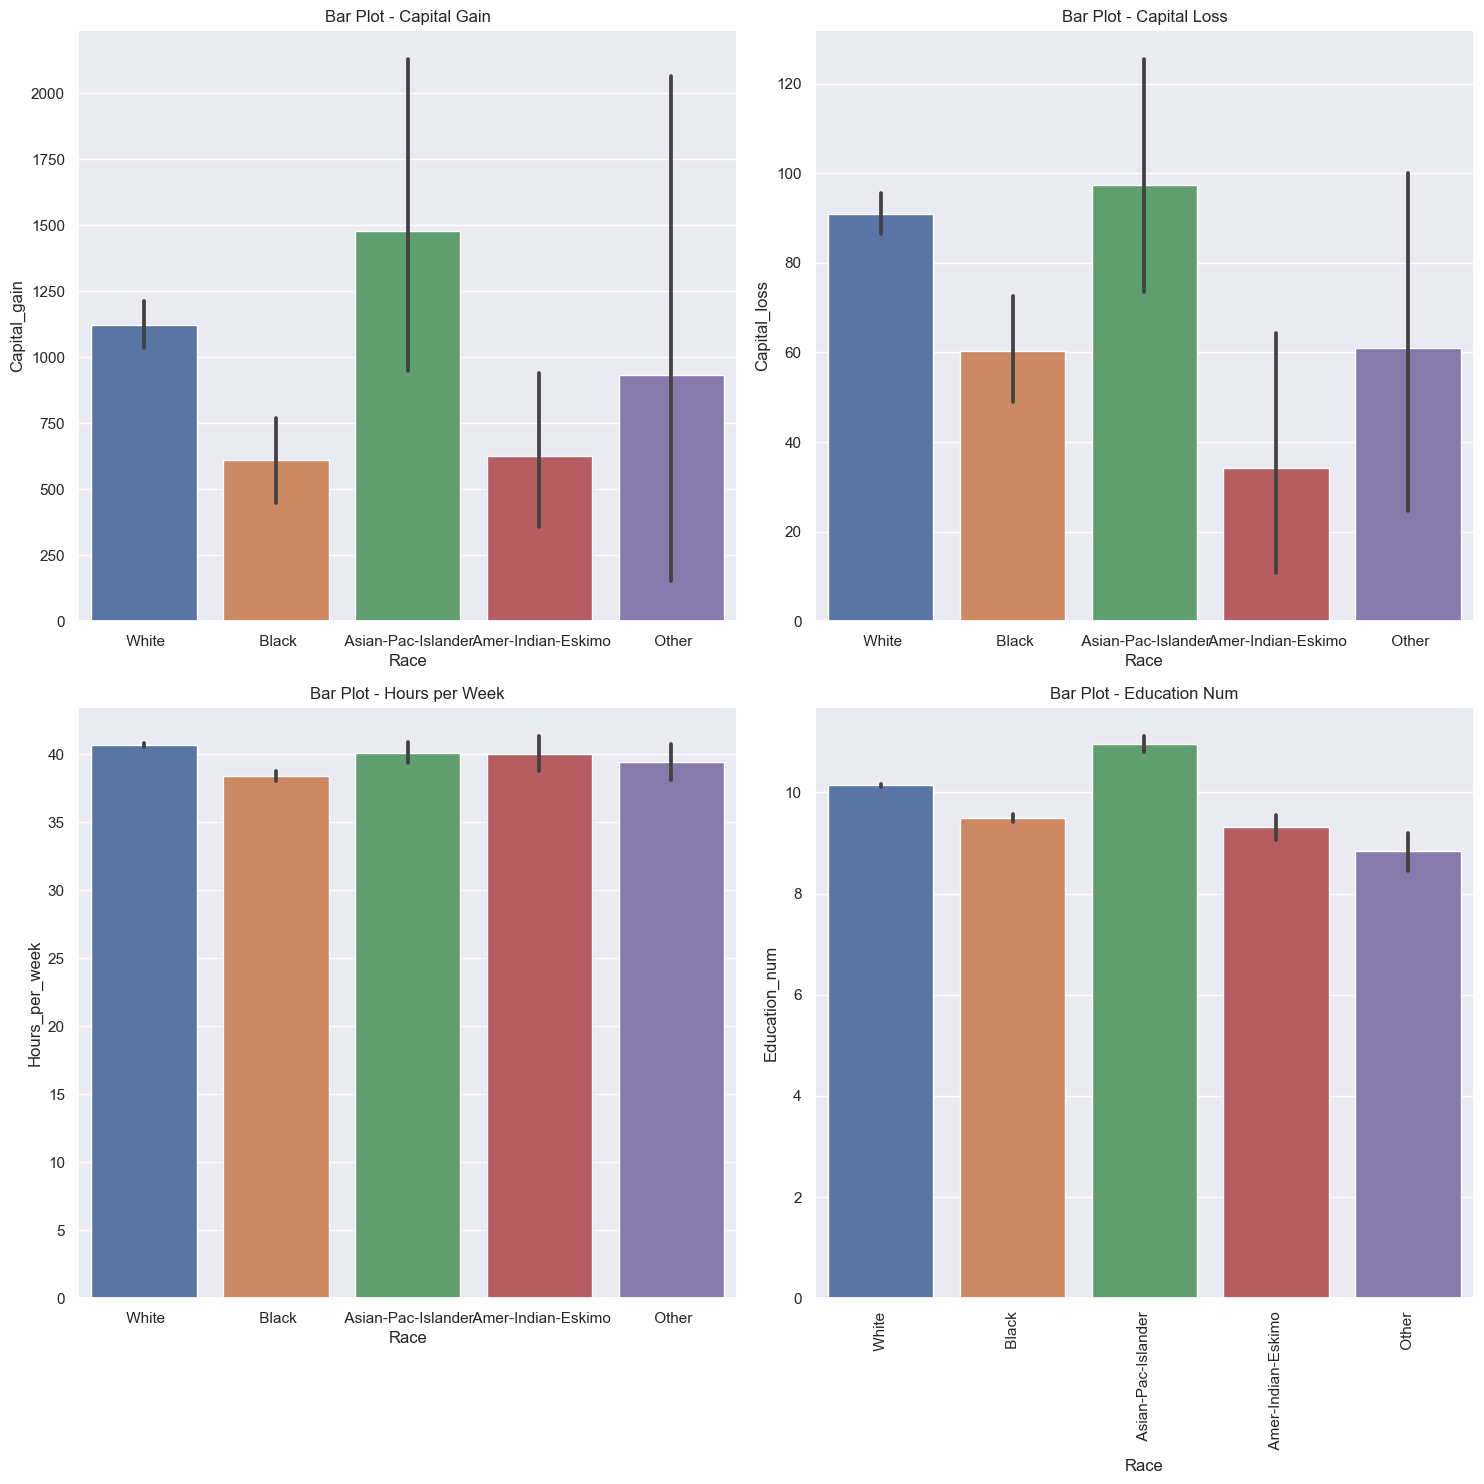

In [95]:
#Numerical col vs Race 

plt.rcParams['figure.figsize'] = [15, 15]
sns.set(style='darkgrid')

# Create subplots
fig, axes = plt.subplots(2, 2)
# Rotate x-axis ticks
plt.xticks(rotation=90)
# Bar plots
axes[0, 0].set_title('Bar Plot - Capital Gain')
sns.barplot(x='Race', y='Capital_gain', data=df, ax=axes[0, 0])

axes[0, 1].set_title('Bar Plot - Capital Loss')
sns.barplot(x='Race', y='Capital_loss', data=df, ax=axes[0, 1])

axes[1, 0].set_title('Bar Plot - Hours per Week')
sns.barplot(x='Race', y='Hours_per_week', data=df, ax=axes[1, 0])

axes[1, 1].set_title('Bar Plot - Education Num')
sns.barplot(x='Race', y='Education_num', data=df, ax=axes[1, 1])


plt.tight_layout()
plt.show()

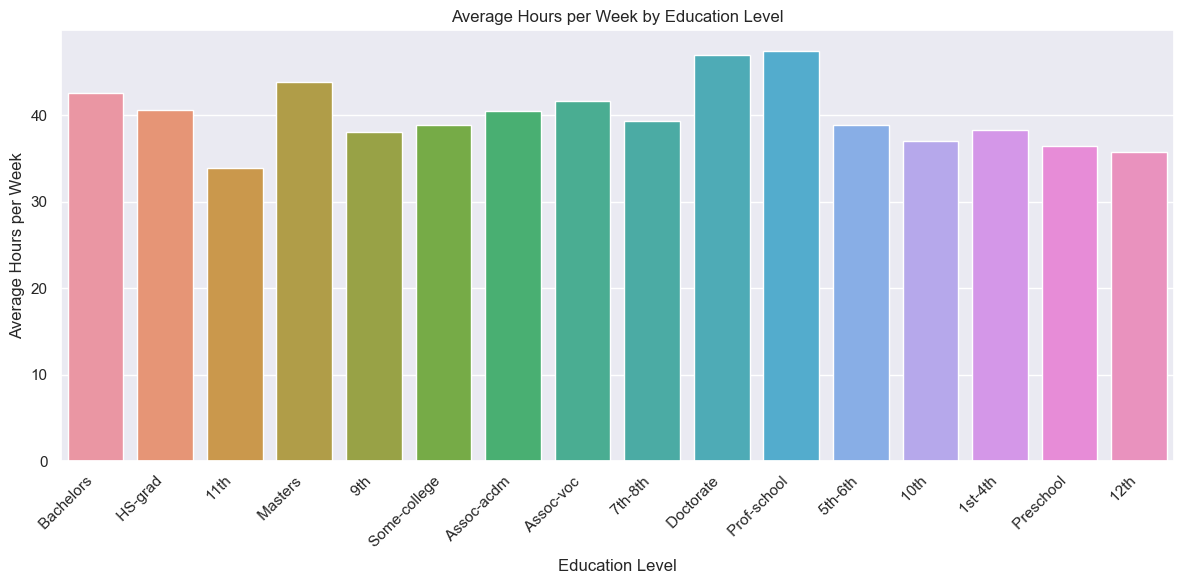

In [96]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Education', y='Hours_per_week', data=df, ci=None)  # ci=None removes error bars
plt.title('Average Hours per Week by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Hours per Week')
plt.xticks(rotation=45, ha='right')  # Adjust x-axis labels for better readability
plt.show()


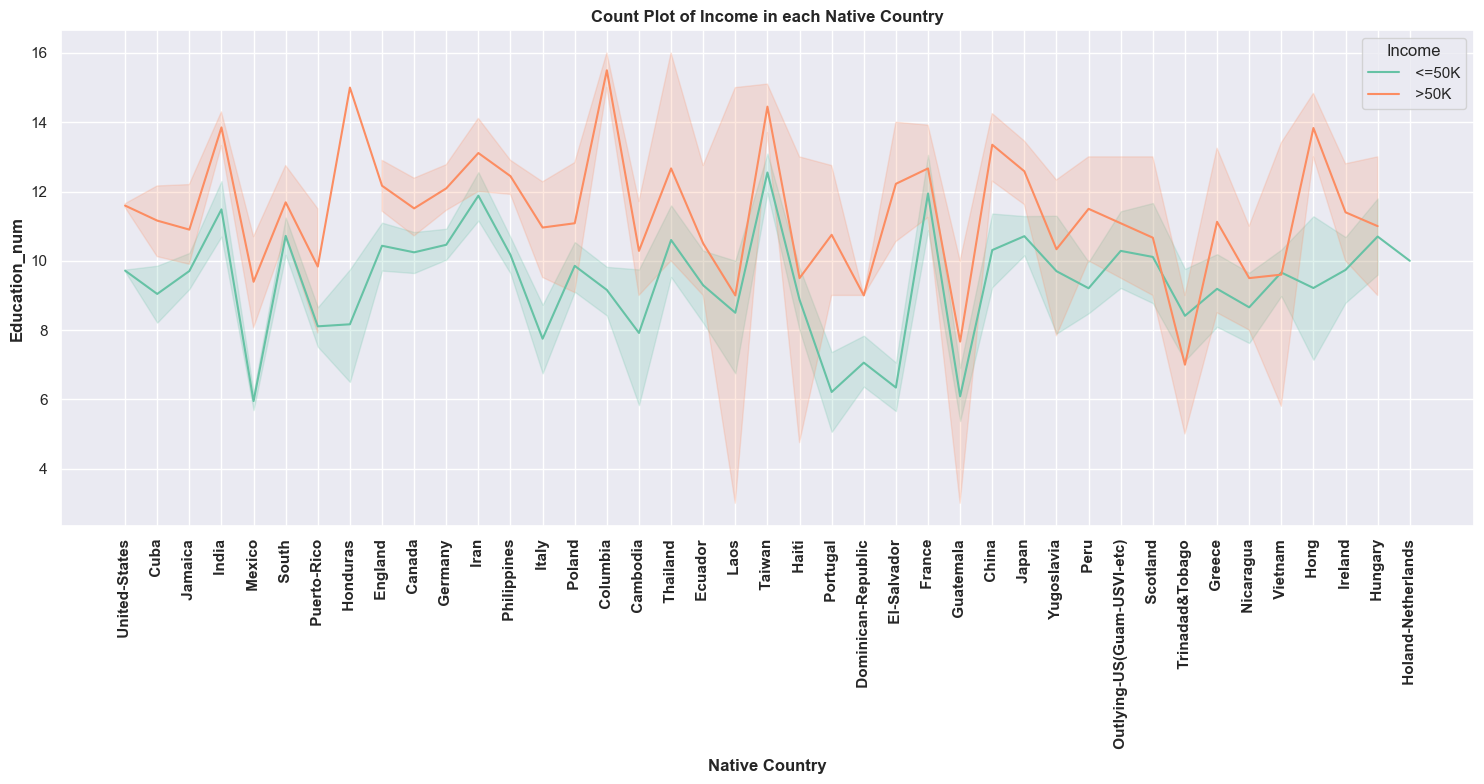

In [98]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Native_country',y='Education_num', data=df, hue='Income', palette='Set2')
plt.title('Count Plot of Income in each Native Country',fontweight='bold')
plt.xlabel('Native Country',fontweight='bold')
plt.ylabel('Education_num',fontweight='bold')
plt.xticks(rotation=90,fontweight='bold')
plt.show()



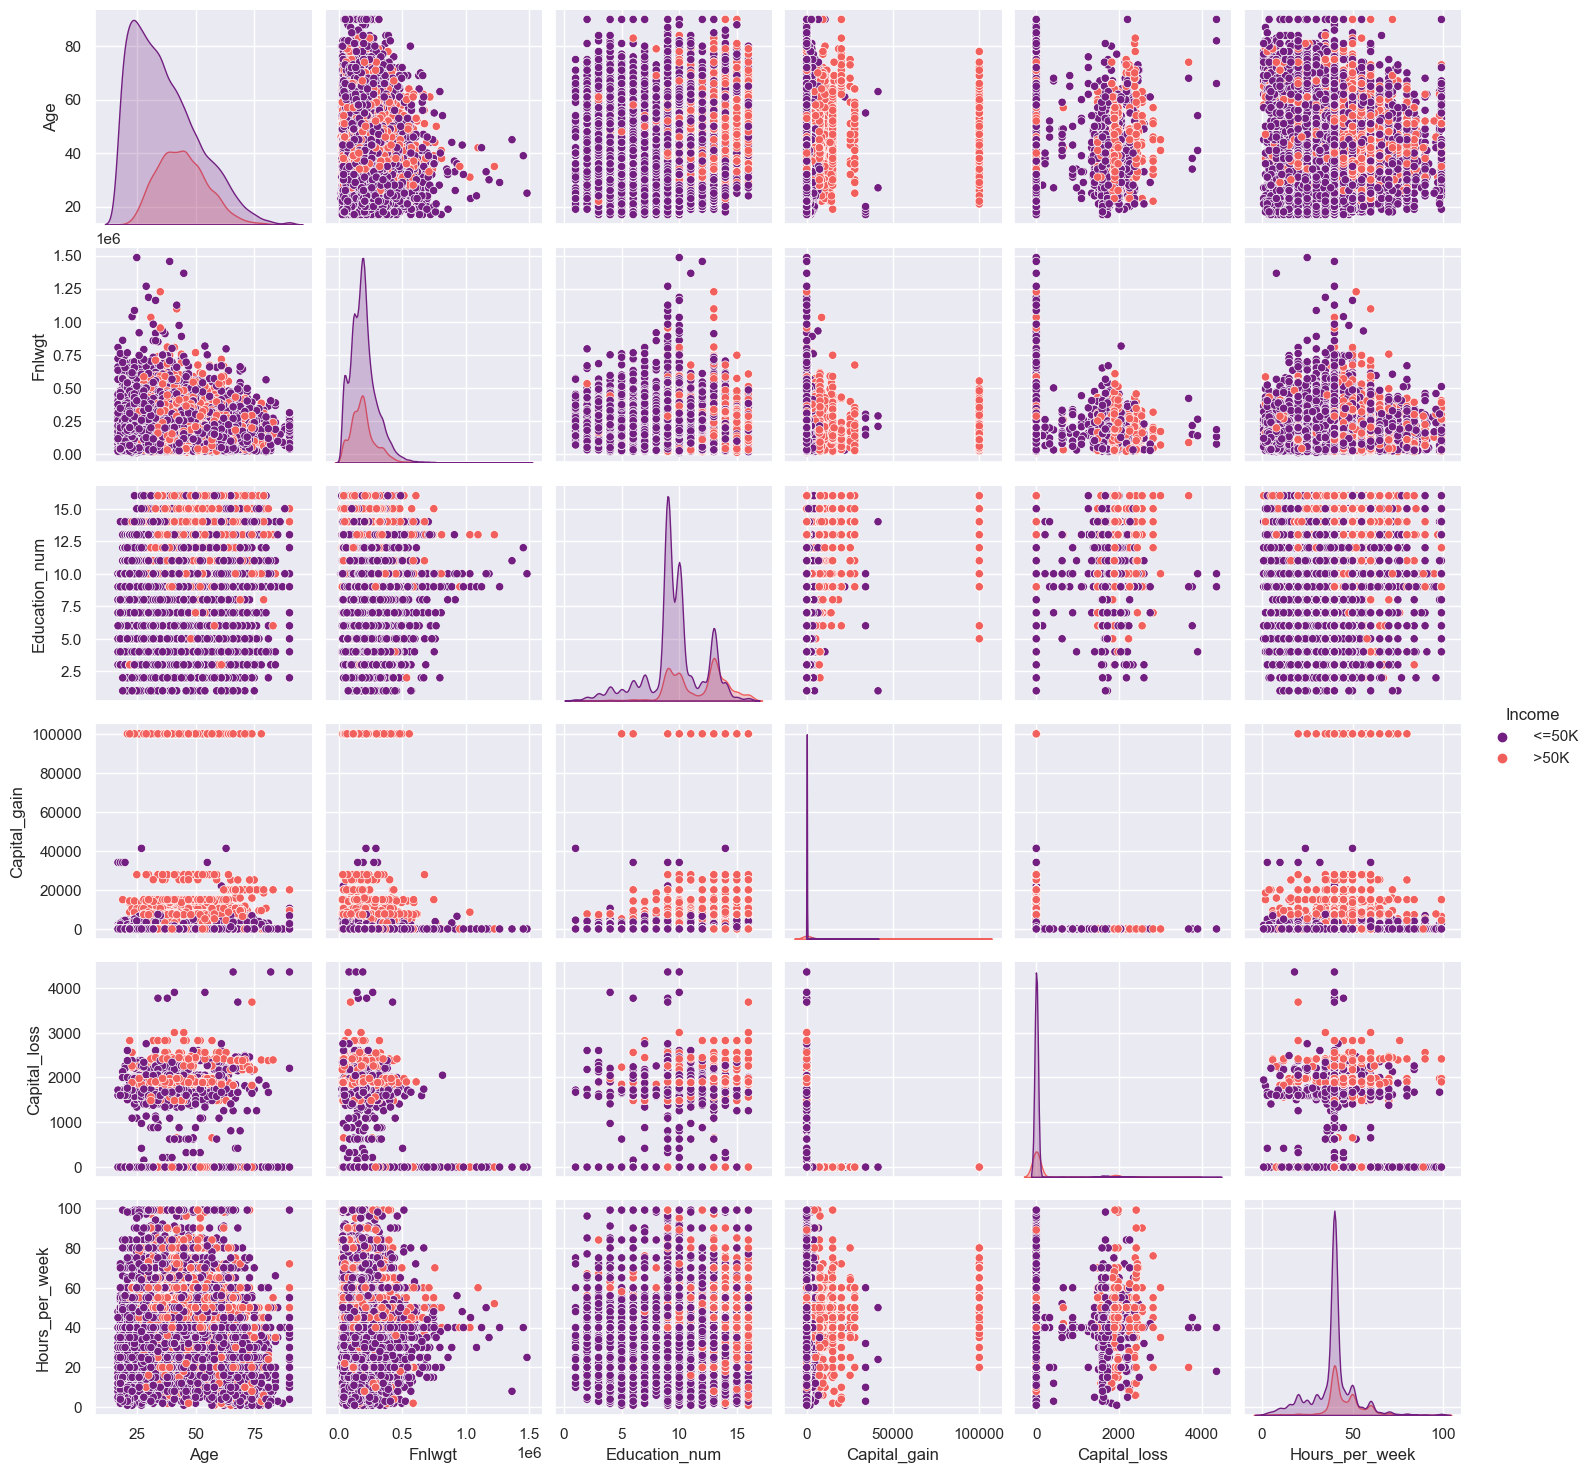

In [99]:
sns.pairplot(df,hue="Income",palette="magma")

# Dropping unnesessary columns.

In [100]:
df.drop("Age Group", axis=1, inplace=True)

# Encoding categorical data

In [101]:
# Using Label Encoder for categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorial_col:
    df[i] = le.fit_transform(df[i])
df.head()

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0   50          5   83311          9             13               2   
1   38          3  215646         11              9               0   
2   53          3  234721          1              7               2   
3   28          3  338409          9             13               2   
4   37          3  284582         12             14               2   

   Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0           3             0     4    1             0             0   
1           5             1     4    1             0             0   
2           5             0     2    1             0             0   
3           9             5     2    0             0             0   
4           3             5     4    0             0             0   

   Hours_per_week  Native_country  Income  
0              13              38       0  
1              40              38       0  
2              40              38       0  
3              40               4       0  
4              40              38       0

# Feature selection and Engineering

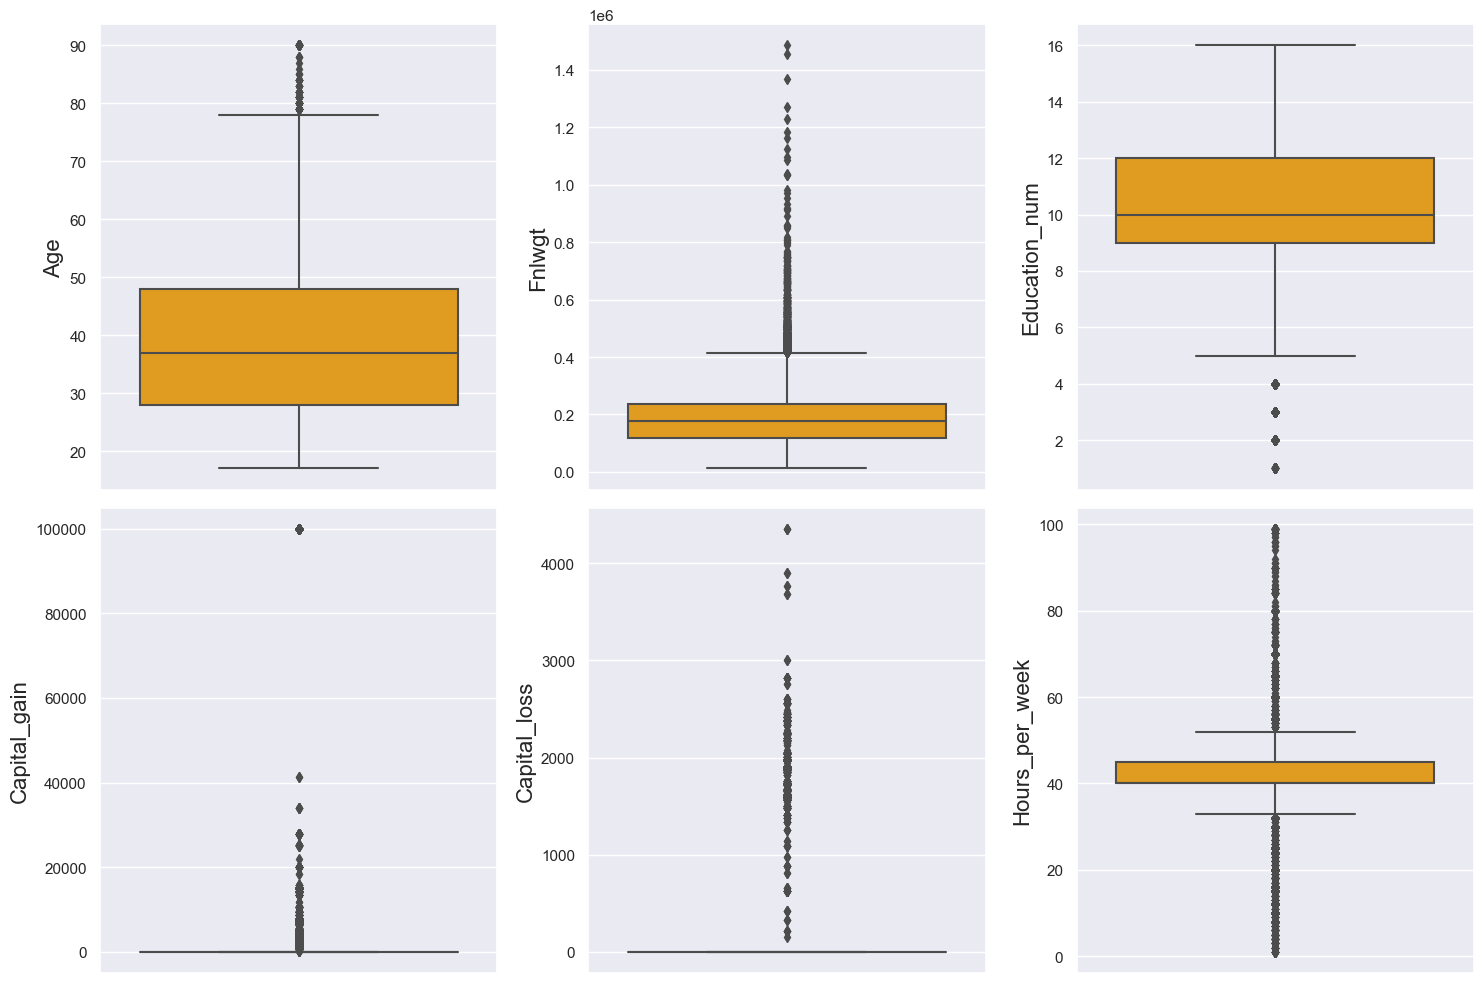

In [102]:
plt.figure(figsize=(15, 10), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber <= 6:
        ax = plt.subplot(2, 3, plotnumber)
        sns.boxplot(y=column, data=df, color='orange')
        plt.ylabel(column, fontsize=16)
    plotnumber += 1

plt.tight_layout()
plt.show()


Observation:

As we can observe that there are outliners are present in the all numerical columns.
so first we are going to use Zscore method for removing outliners.

In [103]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (32536, 15)
Shape of the dataframe after removing outliers:  (27751, 15)
Percentage of data loss post outlier removal:  14.706786328989427


So here we can see that the data loss is 14.7%.as our dataset is large so we can afford it.We have the option of using the quantile approach, however based on the boxplot, we can conclude that lower capping will result in useful data loss and, finally, data loss that is more than the zscore method.

# Skewness of features

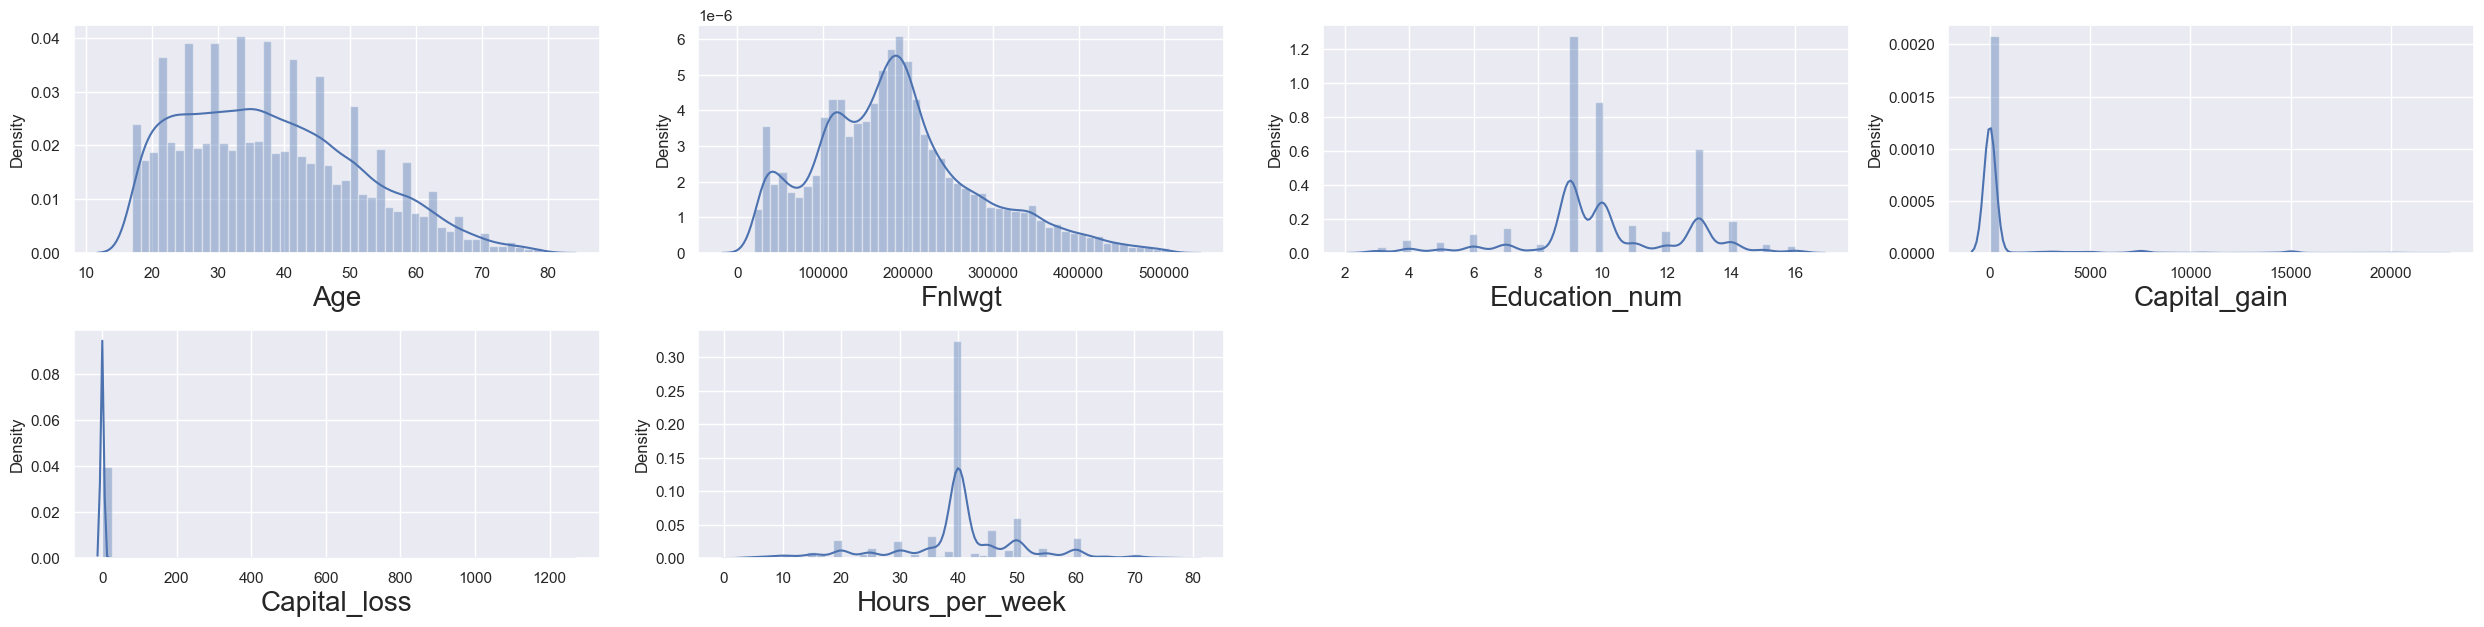

In [104]:
plt.figure(figsize=(25,15),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=6:
        plt.subplot(5,4,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

so here we can see the skewness in the data.

In [105]:
df.skew()

Age                0.484822
Workclass          0.081802
Fnlwgt             0.629037
Education         -0.955723
Education_num     -0.145695
Marital_status    -0.045059
Occupation         0.013496
Relationship       0.753378
Race              -2.587054
Sex               -0.688876
Capital_gain       4.928795
Capital_loss      29.504415
Hours_per_week    -0.358726
Native_country    -5.411057
Income             1.322128
dtype: float64

Observation:
    
Relationship,Sex,Native_country,Income are all skewed, but because they are categorical, the idea of skewness means nothing to them.

Capital_gain and Capital_loss are numeric variables with a large number of zeros and ones. As a result, they have skewness. It is pointless to alter it since the resulting data will be distorted.

In [106]:
skew=['Capital_loss','Capital_gain']


scaler = PowerTransformer(method='yeo-johnson')

df[skew] = scaler.fit_transform(df[skew].values)

In [107]:
df[skew].skew()

Capital_loss    24.774117
Capital_gain     3.067924
dtype: float64

So it can not removed but reduced somewhat.

# Heatmap Correlation

In [108]:
df.corr()

Age  Workclass    Fnlwgt  Education  Education_num  \
Age             1.000000   0.030416 -0.077342  -0.003984       0.044602   
Workclass       0.030416   1.000000 -0.026825   0.001559      -0.001812   
Fnlwgt         -0.077342  -0.026825  1.000000  -0.021254      -0.040000   
Education      -0.003984   0.001559 -0.021254   1.000000       0.346921   
Education_num   0.044602  -0.001812 -0.040000   0.346921       1.000000   
Marital_status -0.286029  -0.016039  0.029528  -0.037165      -0.058419   
Occupation     -0.001196   0.008068 -0.002084  -0.042268       0.072769   
Relationship   -0.270566  -0.057876  0.015059  -0.009515      -0.092841   
Race            0.020581   0.066438 -0.102369   0.026706       0.082854   
Sex             0.089817   0.069649  0.023150  -0.031634       0.003962   
Capital_gain    0.122524   0.001146 -0.006375   0.017459       0.105924   
Capital_loss    0.021724  -0.010429  0.000950  -0.000724       0.006664   
Hours_per_week  0.090644   0.028328 -0.018497   0.059634       0.156044   
Native_country  0.035621   0.002607 -0.105660   0.091185       0.147551   
Income          0.241574  -0.007850 -0.011713   0.071005       0.319622   

                Marital_status  Occupation  Relationship      Race       Sex  \
Age                  -0.286029   -0.001196     -0.270566  0.020581  0.089817   
Workclass            -0.016039    0.008068     -0.057876  0.066438  0.069649   
Fnlwgt                0.029528   -0.002084      0.015059 -0.102369  0.023150   
Education            -0.037165   -0.042268     -0.009515  0.026706 -0.031634   
Education_num        -0.058419    0.072769     -0.092841  0.082854  0.003962   
Marital_status        1.000000    0.036733      0.183957 -0.084552 -0.126222   
Occupation            0.036733    1.000000     -0.038658  0.001550  0.050484   
Relationship          0.183957   -0.038658      1.000000 -0.146544 -0.576987   
Race                 -0.084552    0.001550     -0.146544  1.000000  0.125261   
Sex                  -0.126222    0.050484     -0.576987  0.125261  1.000000   
Capital_gain         -0.064977    0.006825     -0.079924  0.031006  0.063178   
Capital_loss         -0.018074   -0.001282      0.037340 -0.002371 -0.033772   
Hours_per_week       -0.196855   -0.022046     -0.262870  0.057207  0.236827   
Native_country       -0.032029    0.018782     -0.012233  0.021478 -0.009278   
Income               -0.193939    0.030327     -0.247737  0.094979  0.211544   

                Capital_gain  Capital_loss  Hours_per_week  Native_country  \
Age                 0.122524      0.021724        0.090644        0.035621   
Workclass           0.001146     -0.010429        0.028328        0.002607   
Fnlwgt             -0.006375      0.000950       -0.018497       -0.105660   
Education           0.017459     -0.000724        0.059634        0.091185   
Education_num       0.105924      0.006664        0.156044        0.147551   
Marital_status     -0.064977     -0.018074       -0.196855       -0.032029   
Occupation          0.006825     -0.001282       -0.022046        0.018782   
Relationship       -0.079924      0.037340       -0.262870       -0.012233   
Race                0.031006     -0.002371        0.057207        0.021478   
Sex                 0.063178     -0.033772        0.236827       -0.009278   
Capital_gain        1.000000     -0.011977        0.073277        0.022372   
Capital_loss       -0.011977      1.000000       -0.003445        0.000604   
Hours_per_week      0.073277     -0.003445        1.000000        0.005027   
Native_country      0.022372      0.000604        0.005027        1.000000   
Income              0.263838     -0.017376        0.232895        0.047198   

                  Income  
Age             0.241574  
Workclass      -0.007850  
Fnlwgt         -0.011713  
Education       0.071005  
Education_num   0.319622  
Marital_status -0.193939  
Occupation      0.030327  
Relationship   -0.247737  
Race            0.094979  
Sex             0.21

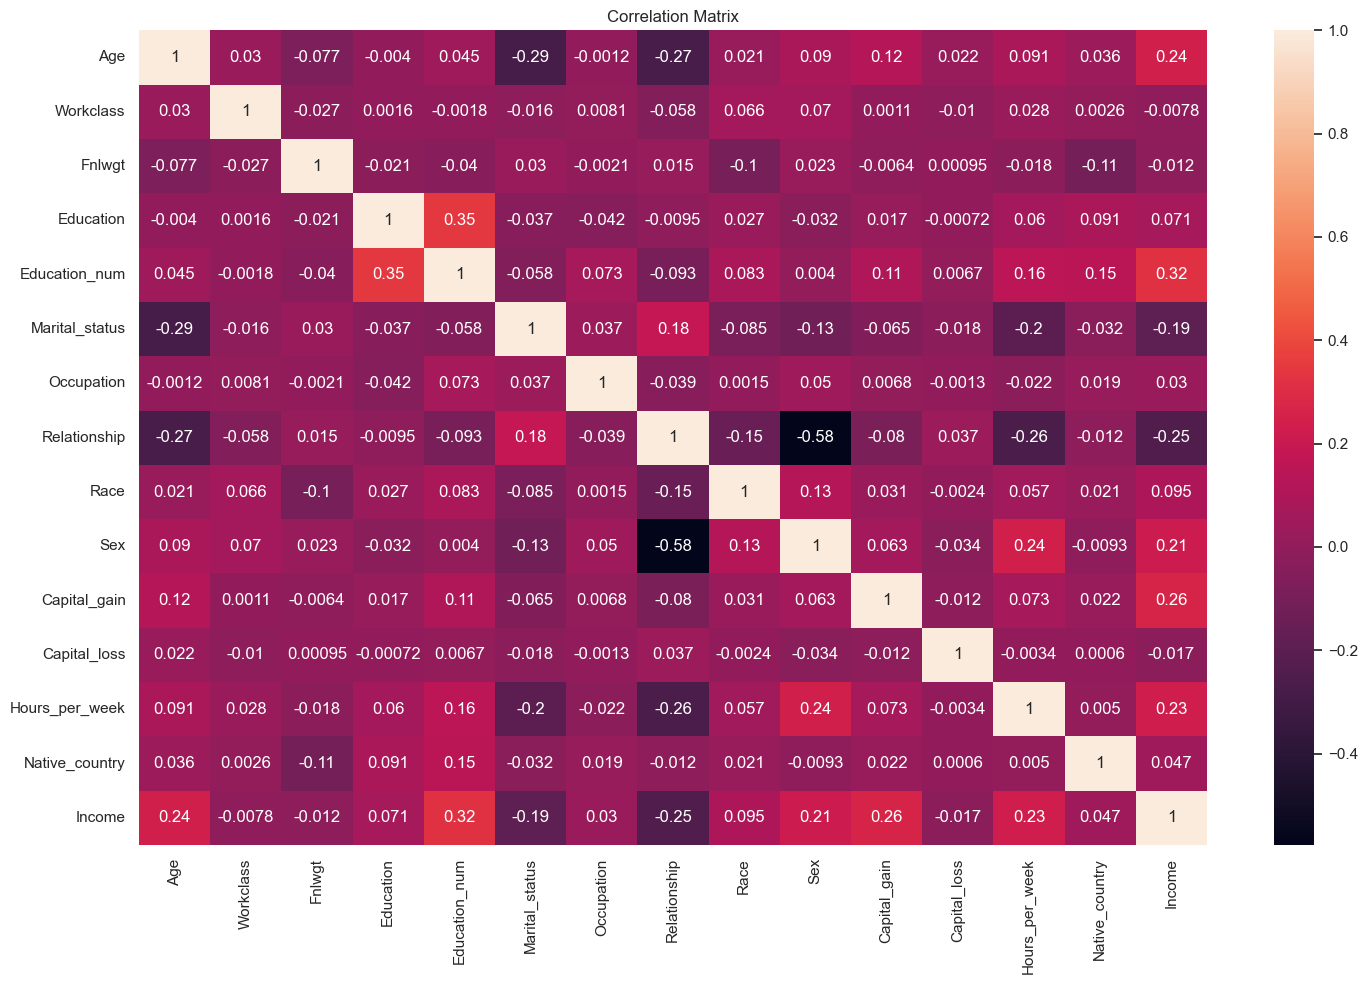

In [109]:
plt.figure(figsize = [15, 10])
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

Observation:
    
Education_num , sex, capital_gain, Hours_per_week are maximum correlated with the target variable.

education num and education are maximum positively correlated in features and sex and relationship are maximum negatively correlated. there is possibilities of muticollinearty.

Capital loss and workclass, occupation, native country, and race had less than a 10% connection with the target variable.

In [110]:
#Dropping Unnesesary columns

# Droping unnecessary columns
df.drop(["Fnlwgt", "Education"], axis=1, inplace=True)

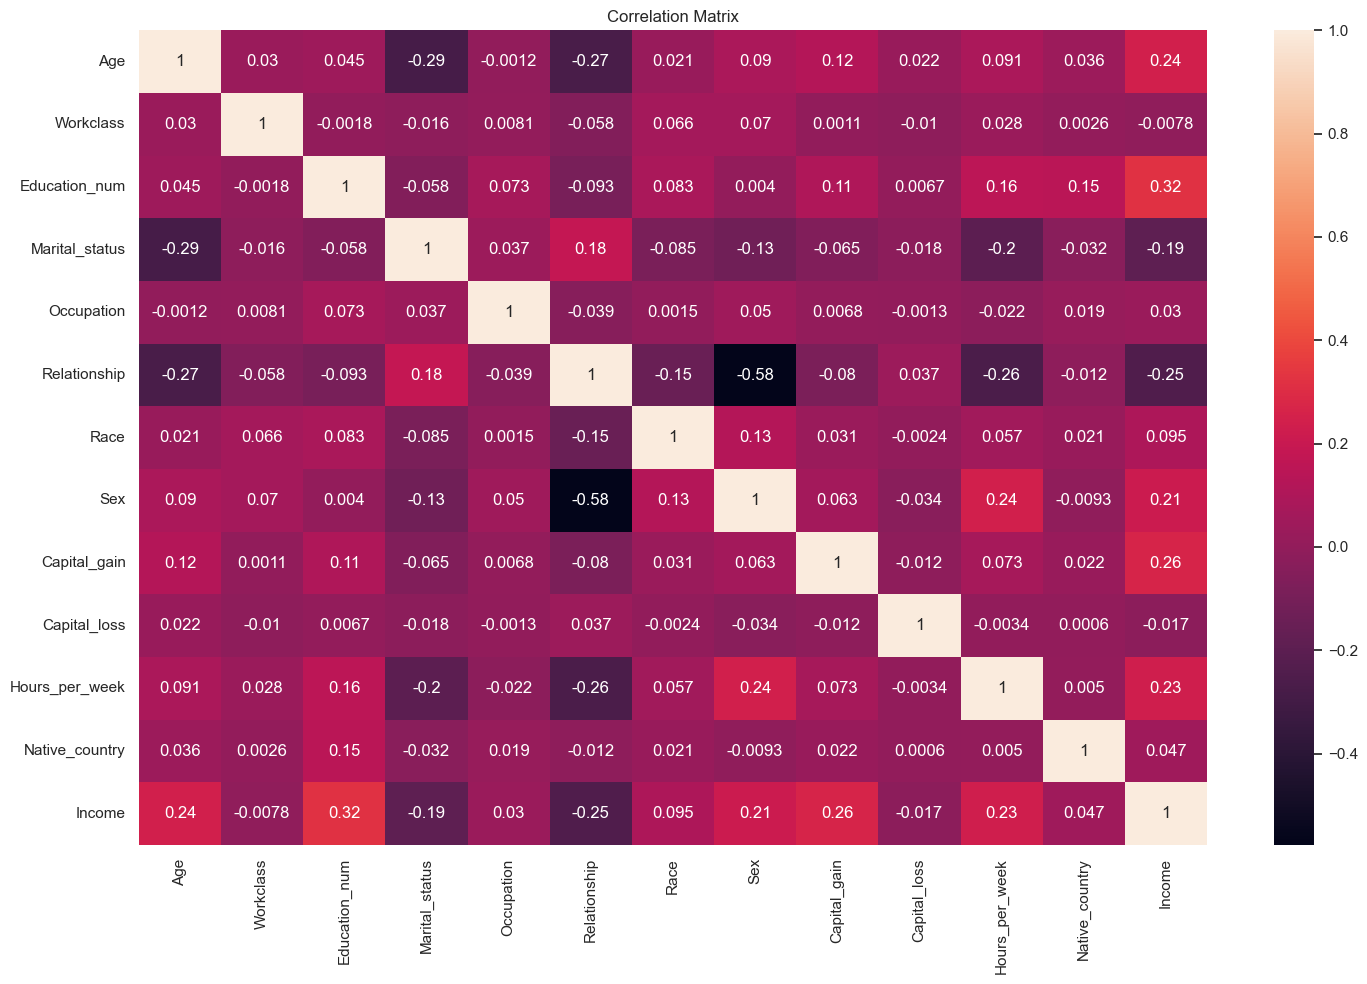

In [111]:
plt.figure(figsize = [15, 10])
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

# Visualizing the correlation between Target and features using bar plot

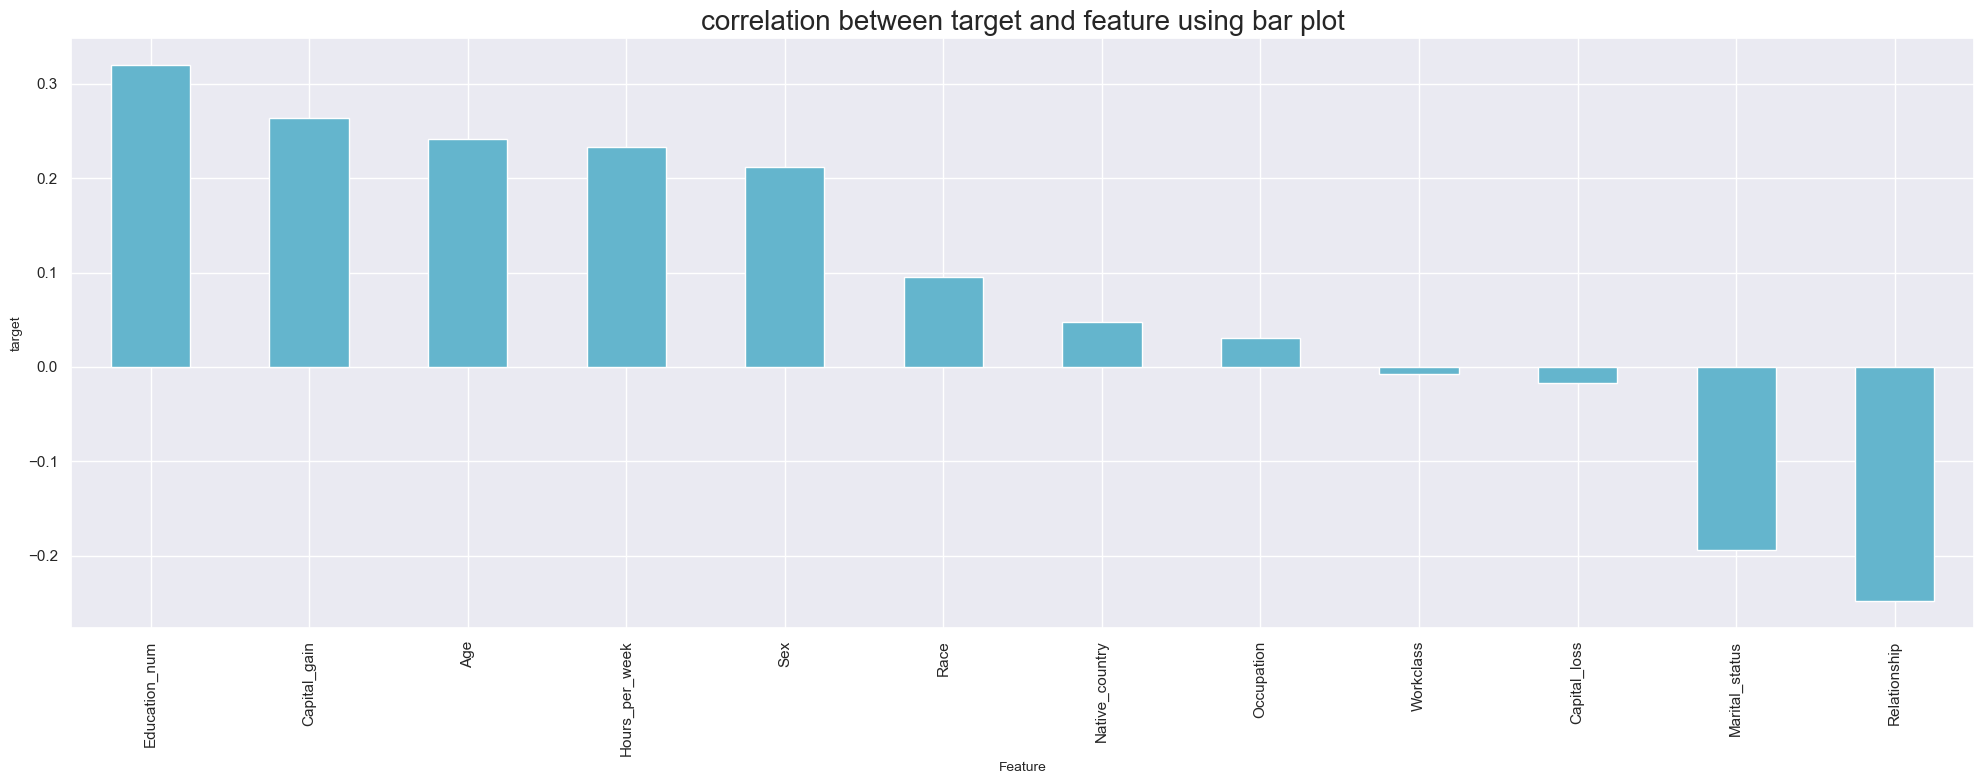

In [112]:
plt.figure(figsize=(20,8))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between target and feature using bar plot',fontsize=20)
plt.show()

The maximum correlation between in features is -0.557 between sex and relationship.

Education_num is significantly highly correlated with the target variable.

After evaluating Mulitcollinearity, we will determine whether to discard these weakly correlated variables or use PCA.

# Checking Multicollinearity between features using variance_inflation_factor

In [113]:
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

VIF        Features
0   10.448023             Age
1    8.806875       Workclass
2   21.249778   Education_num
3    4.360386  Marital_status
4    3.361477      Occupation
5    2.937177    Relationship
6   37.108659            Race
7    4.566872             Sex
8    1.078925    Capital_gain
9    1.003601    Capital_loss
10  15.195816  Hours_per_week
11  79.832635  Native_country
12   1.710461          Income

Removing Some of features that are highly correlated. However, this will not work in this case since the majority of input qualities are either moderated or weakly associated with one another.

we will go with PCA.

# Balanceing Imbalanced target feature

In [114]:
df.Income.value_counts()

0    21527
1     6224
Name: Income, dtype: int64

as we know that Income is our target variable so we have to balance the data.

In [115]:
#Balancing using SMOTE

# Splitting data in target and dependent feature
X = df.drop(['Income'], axis =1)
Y = df['Income']

In [116]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [117]:
Y.value_counts()

0    21527
1    21527
Name: Income, dtype: int64

We successfully handled the class unbalanced problem, and all of the categories now have the same data, ensuring that the ML model is not biased towards one category.

# Standard Scaling

In [118]:
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)


# PCA

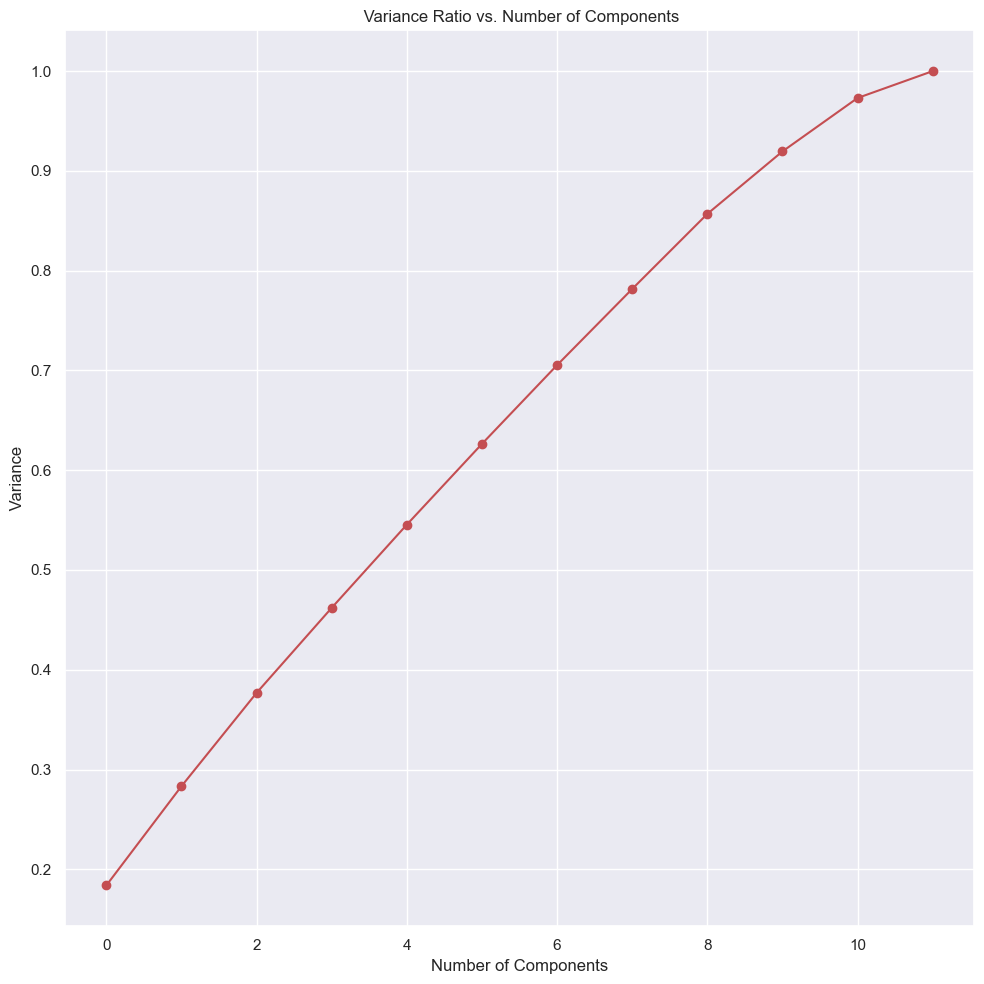

In [119]:
pca = PCA()
x_pca = pca.fit_transform(X_scale)

# Plotting the explained variance ratio
plt.figure(figsize=(10, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel(' Variance ')
plt.title(' Variance Ratio vs. Number of Components')
plt.grid(True)

Observation:

9 primary components represent 90% of the variation in the data, as seen by the graph. We're going to base our prediction on the first 9 variables.

In [120]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X_scale)

In [121]:
principle_x=pd.DataFrame(x_new,columns=np.arange(9))

# Machine Learning Model Building

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (30137, 9)
Training target vector size: (30137,)
Test feature matrix size: (12917, 9)
Test target vector size: (12917,)


In [123]:
#Finding best Random state
maxAccu = 0
maxRS = 0

for i in range(1, 500):
    X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, test_size=0.3, random_state=i)
    log_reg = LogisticRegression()
    log_reg.fit(X_train, Y_train)
    y_pred = log_reg.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

print('Best accuracy is', maxAccu, 'on Random_state', maxRS)


Best accuracy is 0.7645738174498723 on Random_state 483


In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=483, test_size=.3)
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
y_pred = log_reg.predict(X_test)

print('\033[1m' + 'Logistic Regression Evaluation' + '\033[0m\n')
print(f'\033[1mAccuracy Score of Logistic Regression:\033[0m {accuracy_score(Y_test, y_pred)}\n')
print(f'\033[1mConfusion matrix of Logistic Regression:\033[0m\n{confusion_matrix(Y_test, y_pred)}\n')
print(f'\033[1mClassification Report of Logistic Regression:\033[0m\n{classification_report(Y_test, y_pred)}')


Logistic Regression Evaluation

Accuracy Score of Logistic Regression: 0.7645738174498723

Confusion matrix of Logistic Regression:
[[4799 1672]
 [1369 5077]]

Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      6471
           1       0.75      0.79      0.77      6446

    accuracy                           0.76     12917
   macro avg       0.77      0.76      0.76     12917
weighted avg       0.77      0.76      0.76     12917



# Finding Optimal value of n_neighbors for KNN

In [125]:
rmse_val = [] #to store rmse values for different k
for K in range(12):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.40683941451747735
RMSE value for k=  2 is: 0.4303281513864364
RMSE value for k=  3 is: 0.40186142716415224
RMSE value for k=  4 is: 0.41494120294864306
RMSE value for k=  5 is: 0.40996717183816195
RMSE value for k=  6 is: 0.41232088948932344
RMSE value for k=  7 is: 0.4131649454176985
RMSE value for k=  8 is: 0.41512773530373737
RMSE value for k=  9 is: 0.41222699881533165
RMSE value for k=  10 is: 0.4166169875676612
RMSE value for k=  11 is: 0.41288378516368923
RMSE value for k=  12 is: 0.4152209700573675


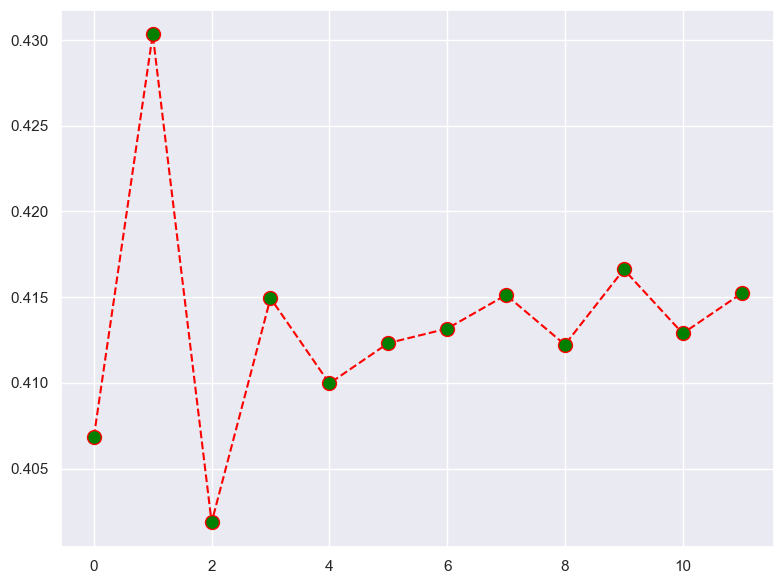

In [126]:
#plotting the RMSE values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(12), rmse_val, color='red', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.show()

RMSE value for k=  3 is: 0.40186142716415224. we get the minimum RMSE.It is safe to state that in this instance, k=3 will provide the optimal outcome.

# Applying other classification algorithm

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7645738174498723


Confusion matrix : 
 [[4799 1672]
 [1369 5077]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.74      0.76      6471
           1       0.75      0.79      0.77      6446

    accuracy                           0.76     12917
   macro avg       0.77      0.76      0.76     12917
weighted avg       0.77      0.76      0.76     12917





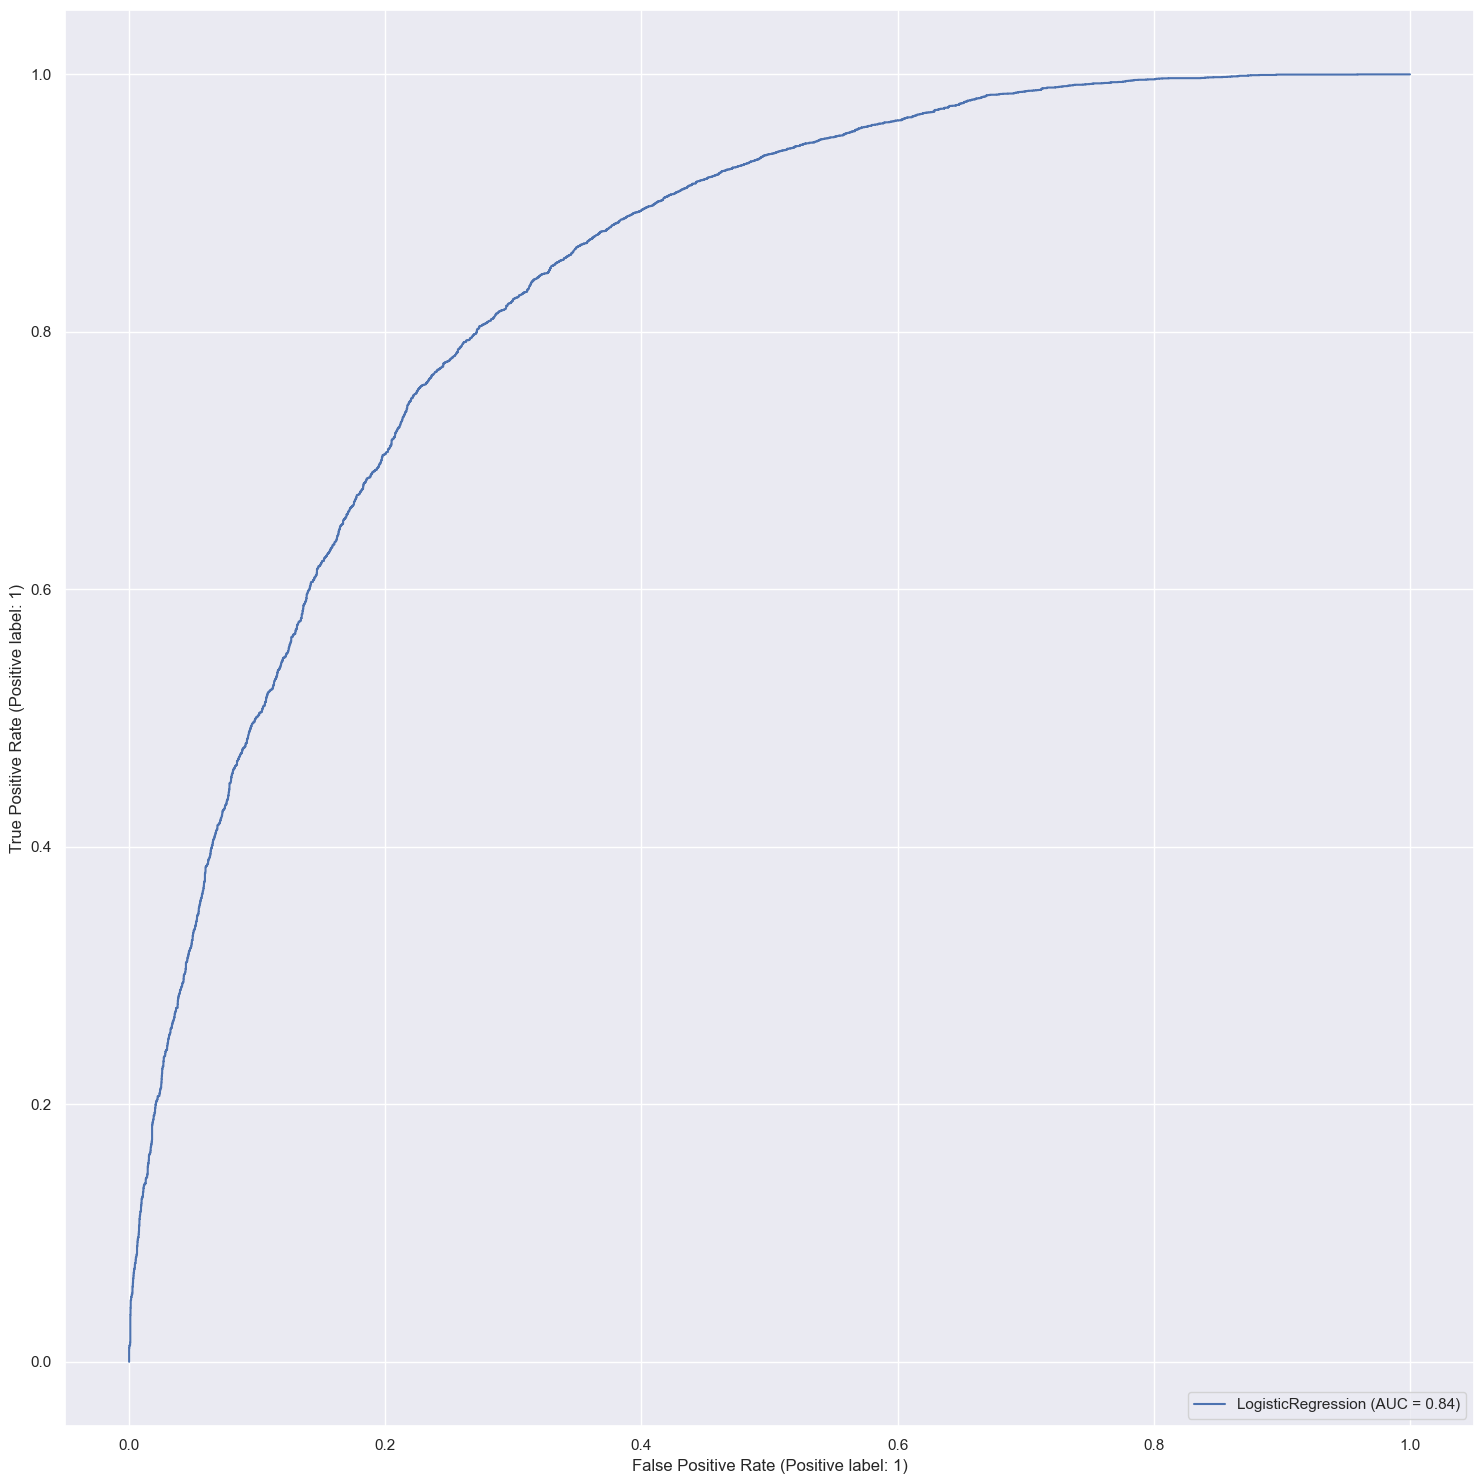

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8184562979019896


Confusion matrix : 
 [[4772 1699]
 [ 646 5800]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.74      0.80      6471
           1       0.77      0.90      0.83      6446

    accuracy                           0.82     12917
   macro avg       0.83      0.82      0.82     12917
weighted avg       0.83      0.82      0.82     12917





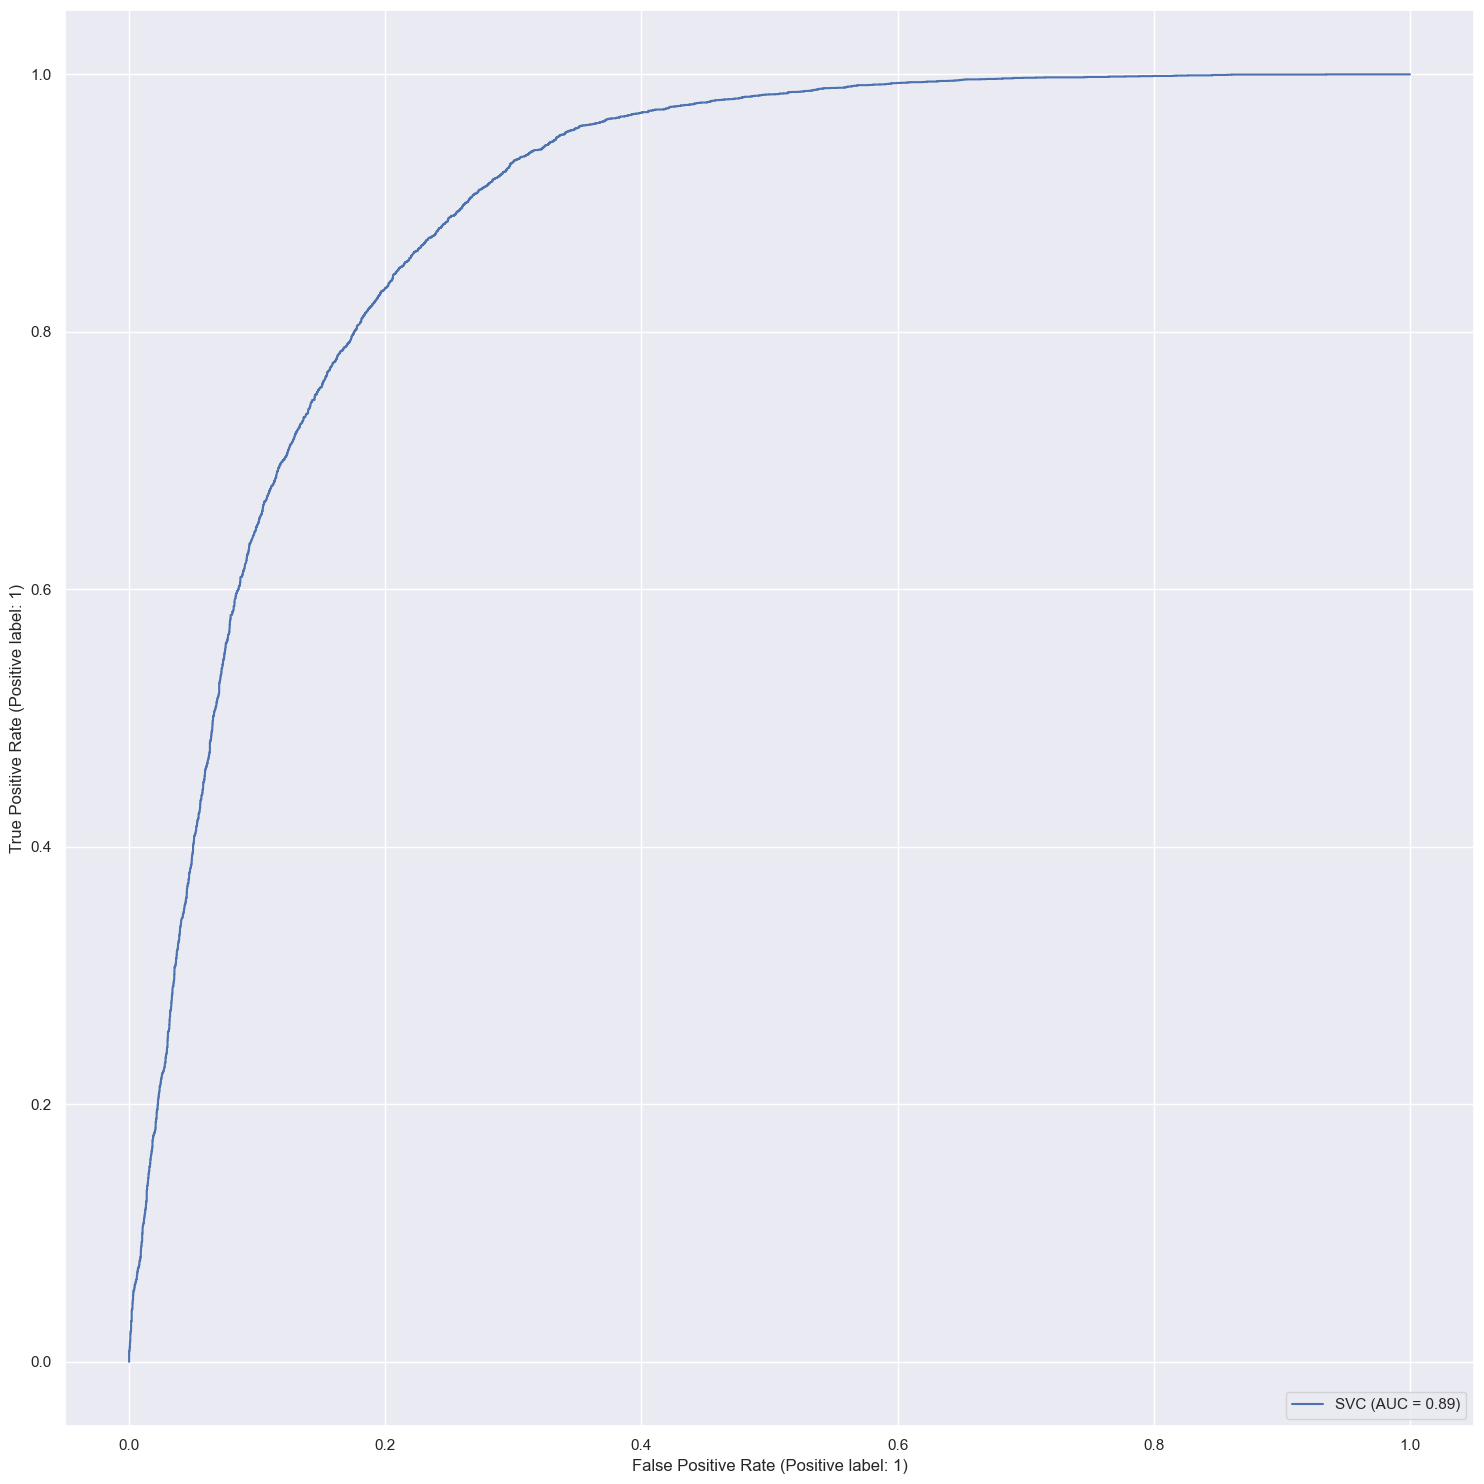

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.8080823720678176


Confusion matrix : 
 [[5127 1344]
 [1135 5311]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      6471
           1       0.80      0.82      0.81      6446

    accuracy                           0.81     12917
   macro avg       0.81      0.81      0.81     12917
weighted avg       0.81      0.81      0.81     12917





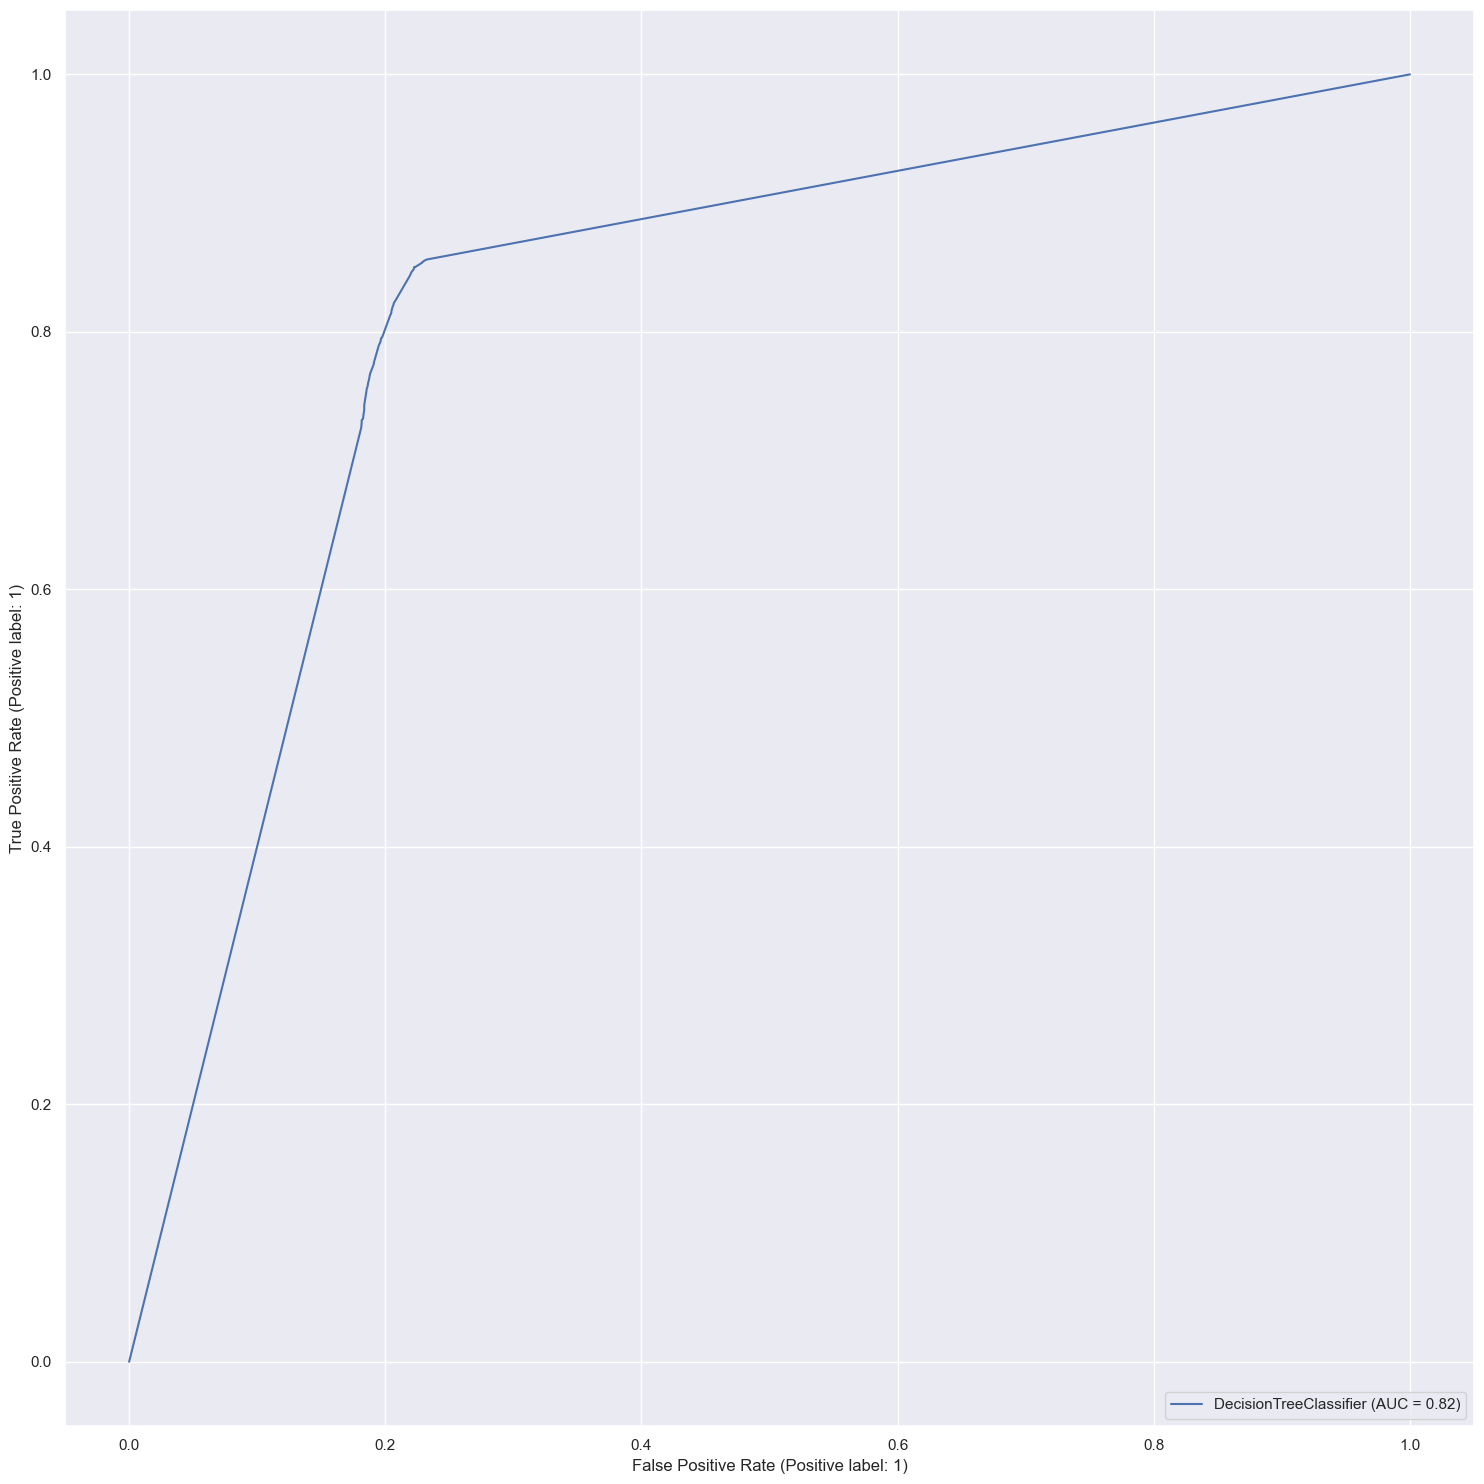

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=3) is


Accuracy Score :
 0.8385073933575907


Confusion matrix : 
 [[5160 1311]
 [ 775 5671]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.80      0.83      6471
           1       0.81      0.88      0.84      6446

    accuracy                           0.84     12917
   macro avg       0.84      0.84      0.84     12917
weighted avg       0.84      0.84      0.84     12917





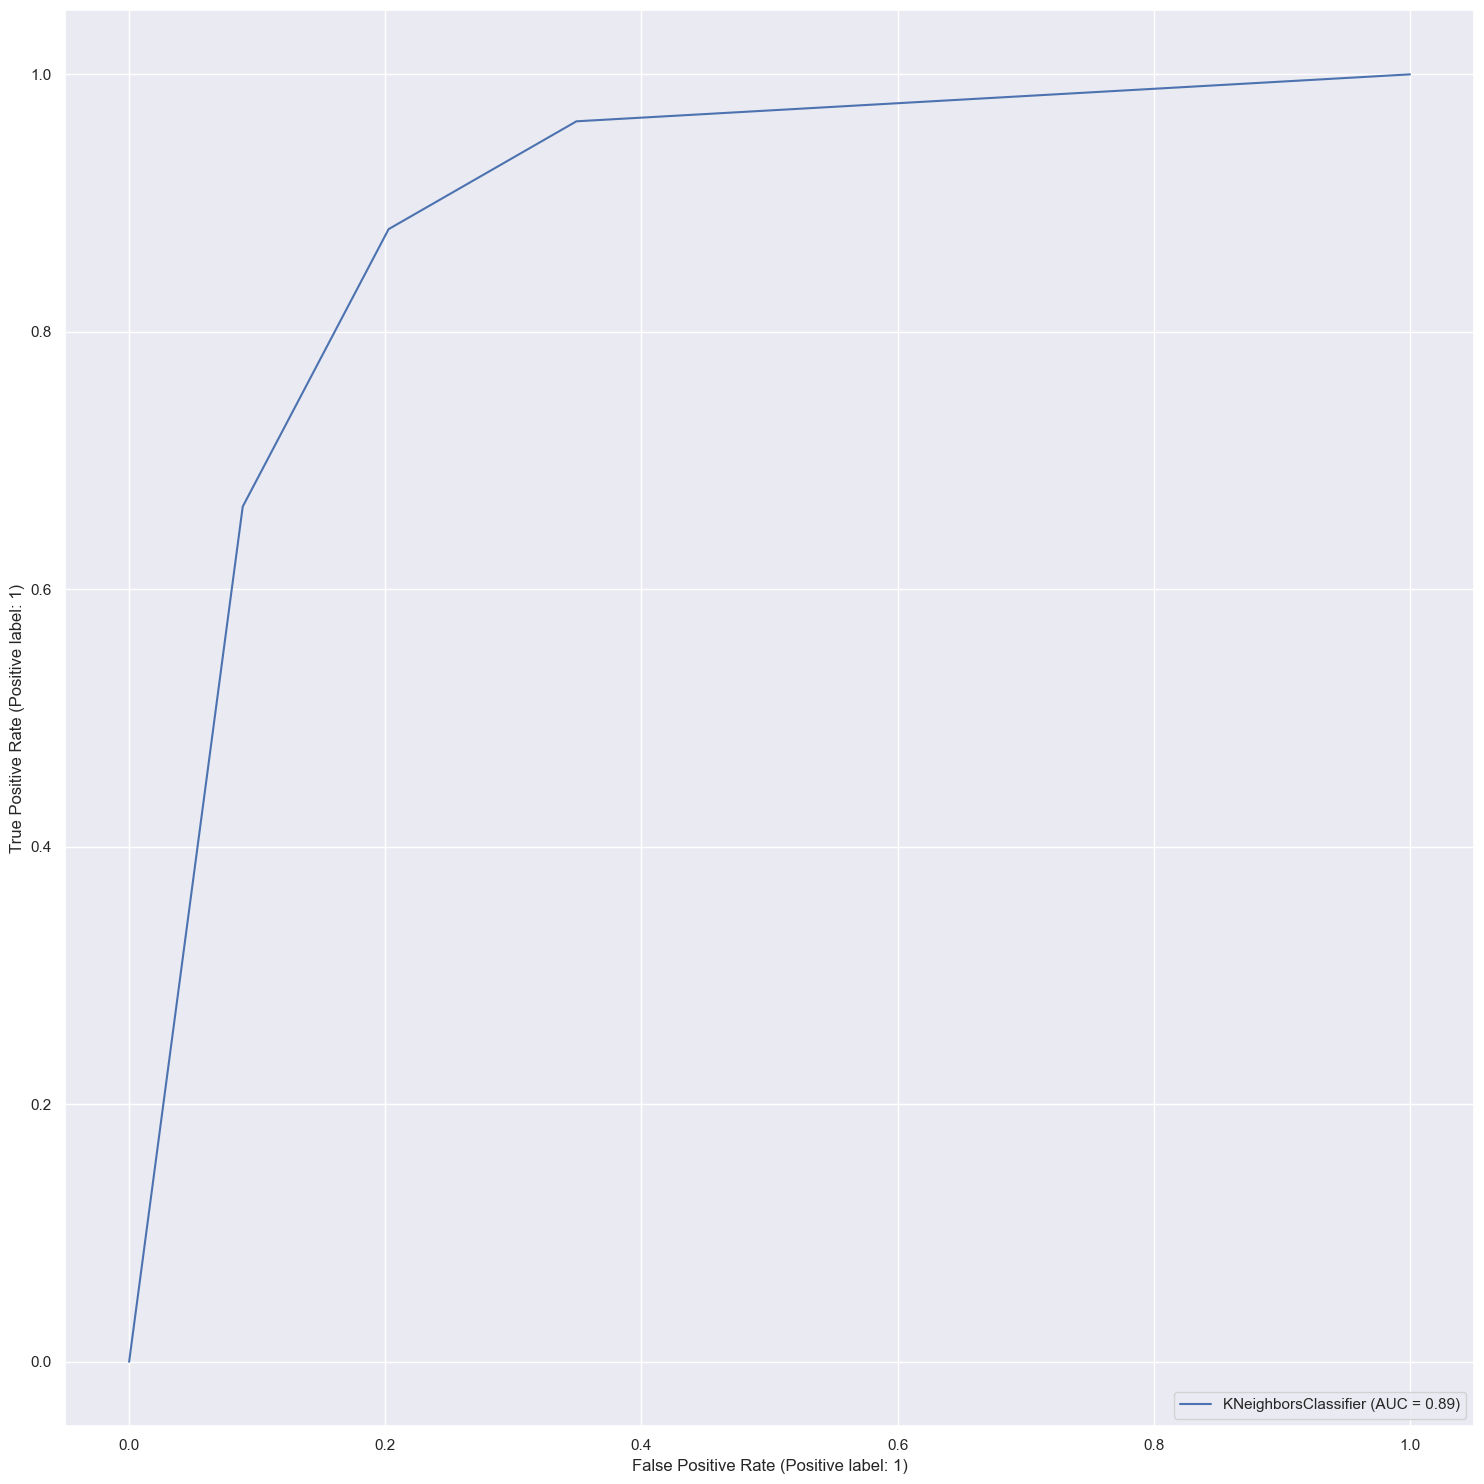

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.8481071456220485


Confusion matrix : 
 [[5329 1142]
 [ 820 5626]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      6471
           1       0.83      0.87      0.85      6446

    accuracy                           0.85     12917
   macro avg       0.85      0.85      0.85     12917
weighted avg       0.85      0.85      0.85     12917





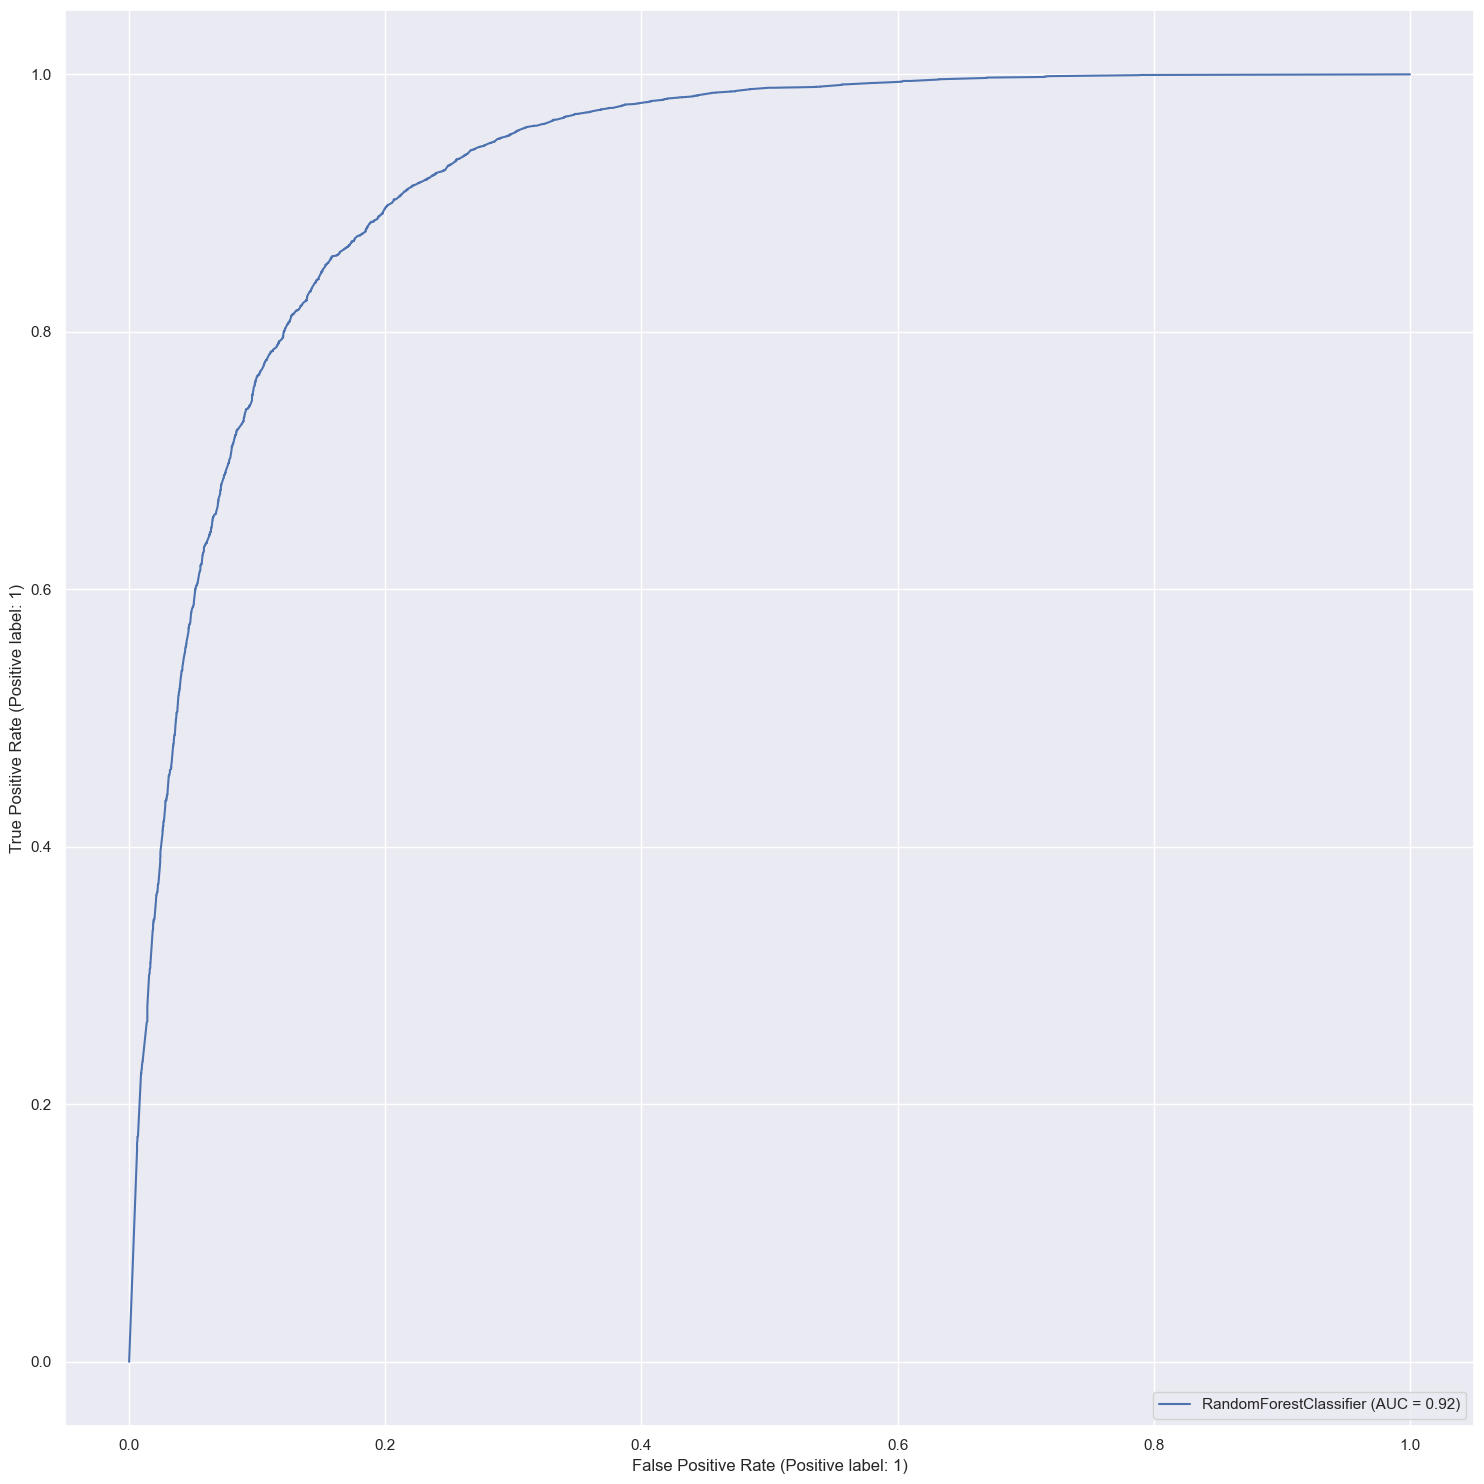

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.8485716497638771


Confusion matrix : 
 [[5404 1067]
 [ 889 5557]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      6471
           1       0.84      0.86      0.85      6446

    accuracy                           0.85     12917
   macro avg       0.85      0.85      0.85     12917
weighted avg       0.85      0.85      0.85     12917





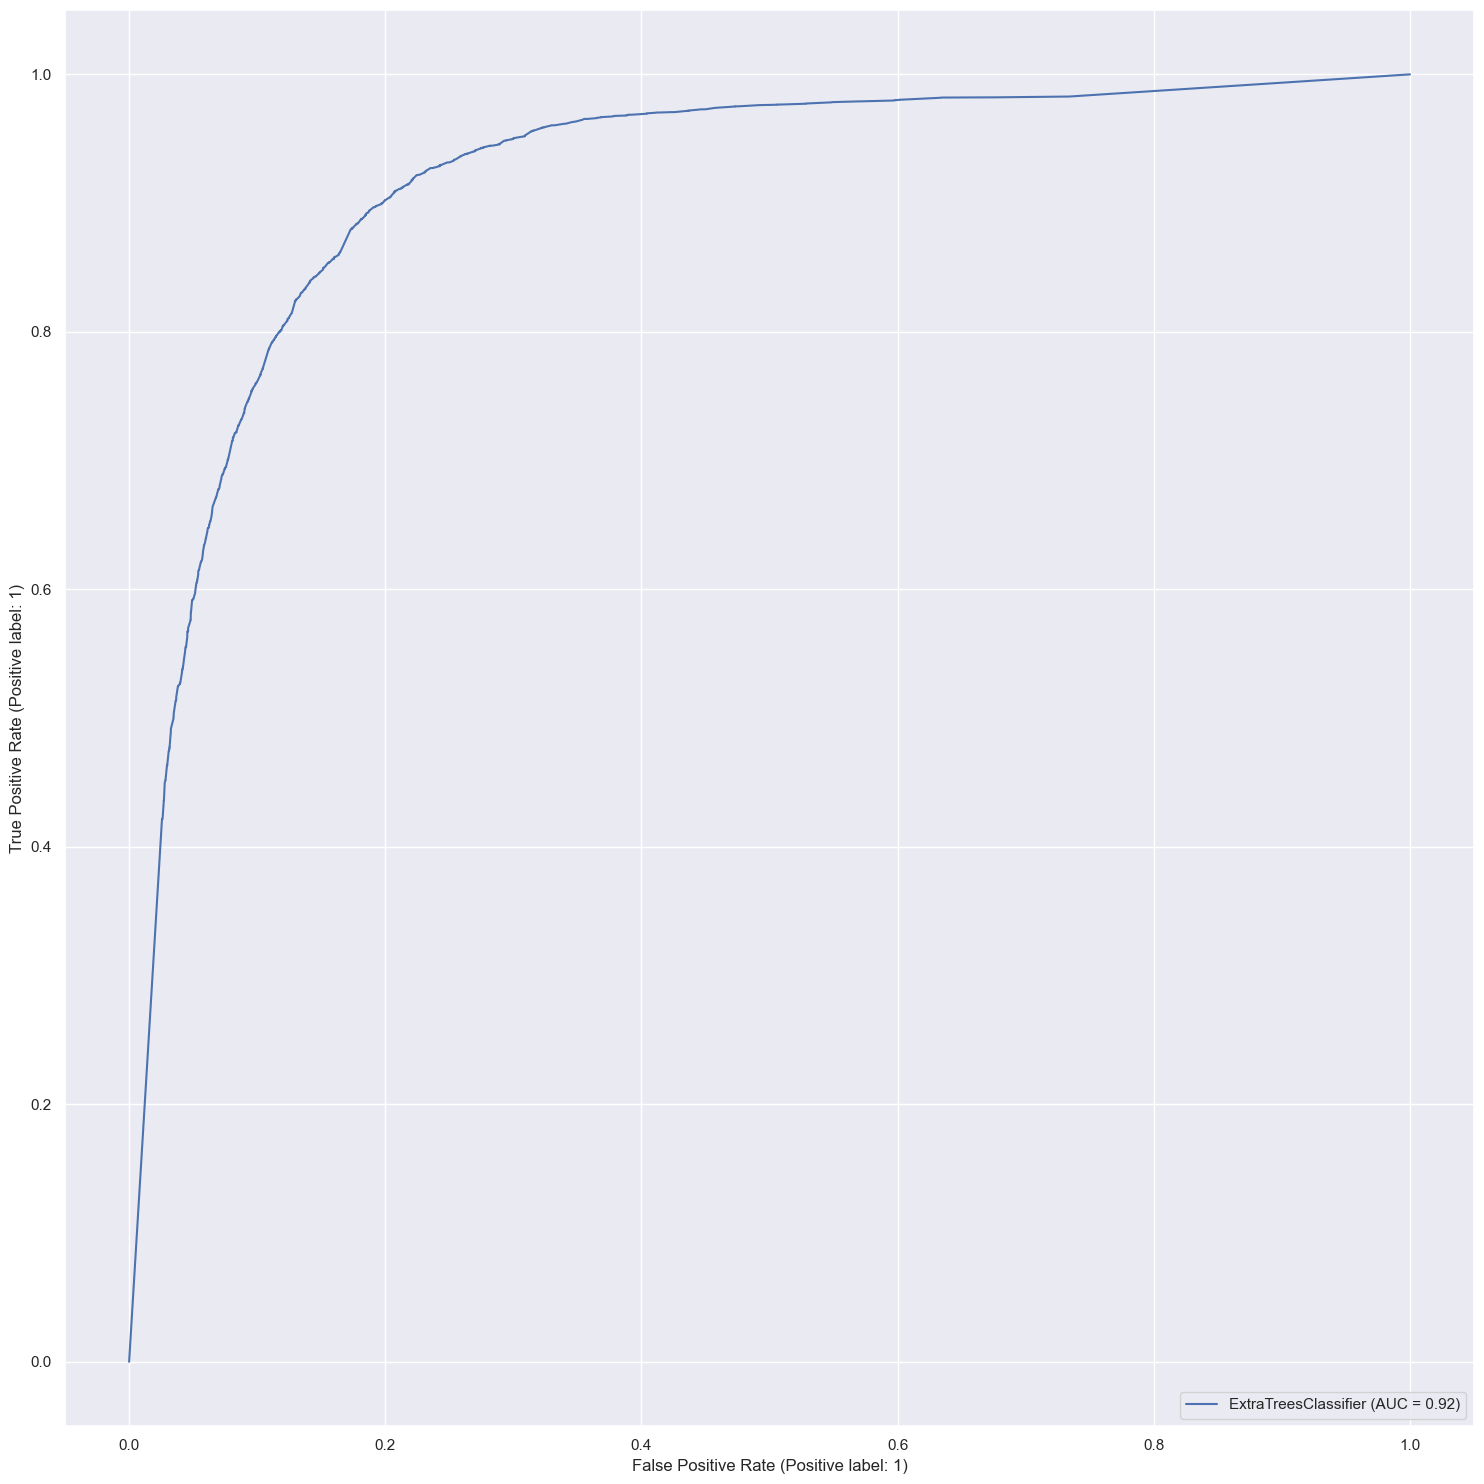

In [127]:
model=[ LogisticRegression(),
        SVC(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    disp = plot_roc_curve(m,X_test,Y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    print('=================================================')

# CrossValidation

In [128]:
model=[LogisticRegression(),
        SVC(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================')



Cross Validation Score LogisticRegression() :

Score : [0.74997097 0.76042272 0.75740332 0.75717106 0.76109175]
Mean Score : 0.7572119635757467
Std deviation : 0.003945428101094739




Cross Validation Score SVC() :

Score : [0.80850075 0.81523633 0.82011381 0.81976542 0.82880372]
Mean Score : 0.8184840042670215
Std deviation : 0.006648419738750565




Cross Validation Score DecisionTreeClassifier() :

Score : [0.78121008 0.80130066 0.82893973 0.82499129 0.82334495]
Mean Score : 0.8119573416548074
Std deviation : 0.018148949035902594




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.80408779 0.8341656  0.85019162 0.84961096 0.84506388]
Mean Score : 0.8366239708252051
Std deviation : 0.017254688205852853




Cross Validation Score RandomForestClassifier() :

Score : [0.82568807 0.84392057 0.86470793 0.86354663 0.86457607]
Mean Score : 0.8524878545133975
Std deviation : 0.015552353321812146




Cross Validation Score ExtraTreesClassifier() :

Score : [0.82266

As we can see, ExtraTreesClassifier() provides the best Cross-validation score, largest f1 score, and good accuracy. We will use the RandomForestClassifier model as our final model after applying hyperparameter adjustment.

# Hyper Parameter Tuning : GridSearchCV

In [129]:
parameter= {'criterion' : ['gini', 'entropy'],
              'min_samples_split':[3,5,8],
              'max_depth' : [20,30,40],
              'n_estimators' : [100, 150, 200]
             }

In [130]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 1/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.849 total time=   1.0s
[CV 2/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 2/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.847 total time=   1.1s
[CV 3/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 3/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.846 total time=   1.0s
[CV 4/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 4/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.844 total time=   1.0s
[CV 5/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 5/5; 1/54

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [100, 150, 200]},
             verbose=10)

In [131]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_split': 3,
 'n_estimators': 200}

In [132]:
FinalCI_mod = ExtraTreesClassifier(criterion='entropy',n_estimators= 200, max_depth=30 ,min_samples_split= 3)
FinalCI_mod.fit(X_train,Y_train)
y_pred=FinalCI_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.854455368893706


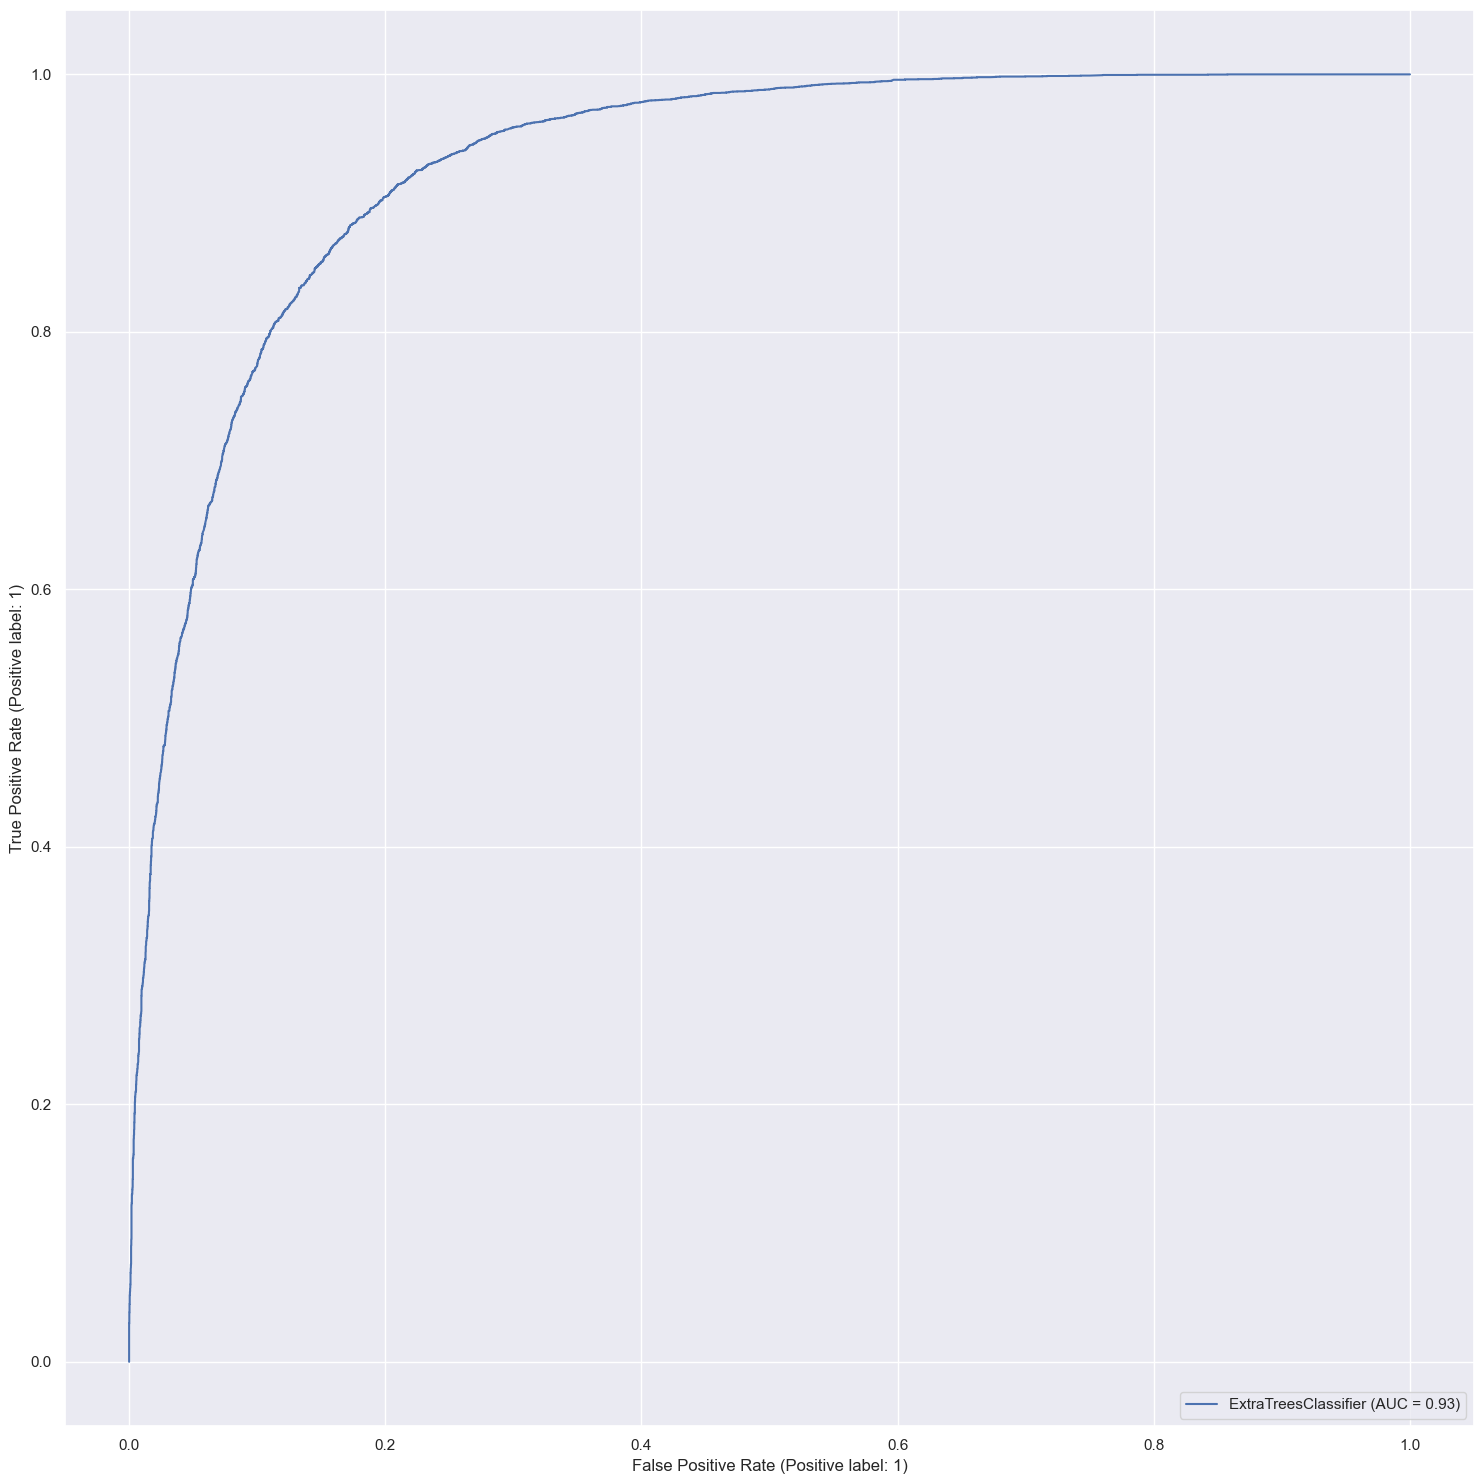

<Figure size 1000x1000 with 0 Axes>

Auc Score :
 0.8545123610036482


In [134]:
disp = plot_roc_curve(FinalCI_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
plt.show()
auc_score = roc_auc_score(Y_test, FinalCI_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving Model

In [136]:
joblib.dump(FinalCI_mod,'Census_Income_Final.pkl')

['Census_Income_Final.pkl']